# 라이브러리

In [4]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import random

#from ggplot import *
#from scipy.stats import logistic
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import *
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
#import graphviz
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from sklearn.svm import SVC, SVR
from matplotlib.ticker import FuncFormatter
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm


# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)


# 데이터불러오기

In [5]:
import pandas as pd
DATA_PATH = './dataset/CARD/'
DATA_PATH_2 = './dataset/CUSTOMER/'
DATA_PATH_3 = './dataset/CC/'
DATA_PATH_4 = './dataset/CC/이전'
#cc_21_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_40(raw).csv', encoding="utf-8-sig")
#cc_21_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_50(raw).csv', encoding="utf-8-sig")
#cc_21_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_60(raw).csv', encoding="utf-8-sig")
#cc_22_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_40(raw).csv', encoding="utf-8-sig")
#cc_22_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_50(raw).csv', encoding="utf-8-sig")
#cc_22_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_60(raw).csv', encoding="utf-8-sig")
#cc_23_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_40(raw).csv', encoding="utf-8-sig")
#cc_23_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_50(raw).csv', encoding="utf-8-sig")
#cc_23_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_60(raw).csv', encoding="utf-8-sig")
#cc_22_40 = pd.read_csv(DATA_PATH_3 + 'cc_22_40.csv', encoding="utf-8-sig")
#cc_22_50 = pd.read_csv(DATA_PATH_3 + 'cc_22_50.csv', encoding="utf-8-sig")
#cc_22_60 = pd.read_csv(DATA_PATH_3 + 'cc_22_60.csv', encoding="utf-8-sig")

#cc_21_40_n = pd.read_csv(DATA_PATH_3 + 'cc_21_40_n.csv', encoding="utf-8-sig")
#cc_21_50_n = pd.read_csv(DATA_PATH_3 + 'cc_21_50_n.csv', encoding="utf-8-sig")
#cc_21_60_n = pd.read_csv(DATA_PATH_3 + 'cc_21_60_n.csv', encoding="utf-8-sig")

# 이전
#cc_22_40_n = pd.read_csv(DATA_PATH_4 + 'cc_22_40_n.csv', encoding="utf-8-sig")
#cc_22_50_n = pd.read_csv(DATA_PATH_4 + 'cc_22_50_n.csv', encoding="utf-8-sig")
#cc_22_60_n = pd.read_csv(DATA_PATH_4 + 'cc_22_60_n.csv', encoding="utf-8-sig")

#cc_22_n = pd.read_csv(DATA_PATH_4 + 'cc_22_n.csv', encoding="utf-8-sig")


#cc_22_40 = pd.read_csv(DATA_PATH_3 + 'cc_22_40.csv', encoding="utf-8-sig")
#cc_22_50 = pd.read_csv(DATA_PATH_3 + 'cc_22_50.csv', encoding="utf-8-sig")
#cc_22_60 = pd.read_csv(DATA_PATH_3 + 'cc_22_60.csv', encoding="utf-8-sig")

#cc_22_40_r = pd.read_csv(DATA_PATH_3 + 'cc_22_40_r.csv', encoding="utf-8-sig")
#cc_22_50_r = pd.read_csv(DATA_PATH_3 + 'cc_22_50_r.csv', encoding="utf-8-sig")
#cc_22_60_r = pd.read_csv(DATA_PATH_3 + 'cc_22_60_r.csv', encoding="utf-8-sig")

In [2]:
cc_22_40_r = pd.read_csv(DATA_PATH_3 + 'cc_22_40_r.csv', encoding="utf-8-sig")
cc_22_50_r = pd.read_csv(DATA_PATH_3 + 'cc_22_50_r.csv', encoding="utf-8-sig")
cc_22_60_r = pd.read_csv(DATA_PATH_3 + 'cc_22_60_r.csv', encoding="utf-8-sig")

# 함수

In [6]:
import time

def execution_time(func):
    """
    함수의 실행 시간을 측정하여, 시:분:초 형식으로 출력하는 데코레이터 함수입니다.

    Parameters:
    func (function): 실행 시간을 측정할 함수.

    Returns:
    function: 실행 시간을 측정하고 출력한 후, 원래 함수의 결과를 반환하는 래퍼 함수.

    Example:
    >>> @execution_time
    >>> def example_function():
    >>>     time.sleep(2)

    >>> example_function()
    Execution time for example_function: 0h 0m 2.00s
    """
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        hours, rem = divmod(elapsed_time, 3600)
        minutes, seconds = divmod(rem, 60)
        print(f"Execution time for {func.__name__}: {int(hours)}h {int(minutes)}m {seconds:.2f}s")
        return result
    return wrapper



import pandas as pd 
import numpy as np

def reduce_mem_usage(df, float16_as32=True):
    """
    데이터프레임의 메모리 사용량을 줄이기 위해 열의 데이터 타입을 최적화하는 함수입니다.
    
    수치형 열에 대해서만 메모리 최적화를 수행하며, 정수형은 int8, int16, int32, int64 등의 가장 작은 가능한 타입으로,
    실수형은 float16, float32, float64로 변환합니다. 기본적으로 float16 대신 float32를 사용할 수 있습니다.

    Parameters:
    df (pd.DataFrame): 메모리 최적화를 적용할 데이터프레임.
    float16_as32 (bool, optional): True일 경우, float16 대신 float32를 사용하여 정밀도를 보장합니다.
                                   기본값은 True입니다.

    Returns:
    pd.DataFrame: 메모리 최적화가 적용된 데이터프레임.

    Example:
    >>> df = pd.DataFrame({'col1': range(100), 'col2': np.random.rand(100)})
    >>> df_optimized = reduce_mem_usage(df)

    출력 예:
    데이터프레임의 초기 메모리 사용량은 0.01 MB입니다.
    최적화 후 데이터프레임의 메모리 사용량은: 0.00 MB입니다.
    메모리 사용량이 90.0% 감소했습니다.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('데이터프레임의 초기 메모리 사용량은 {:.2f} MB입니다.'.format(start_mem))

    for col in df.columns:  # 각 열의 이름을 반복합니다.
        col_type = df[col].dtype  # 열의 데이터 타입을 가져옵니다.
        if col_type != object and str(col_type) != 'category':  # 객체 타입이 아닌 수치형 변수만 처리합니다.
            c_min, c_max = df[col].min(), df[col].max()  # 해당 열의 최소값과 최대값을 계산합니다.
            if str(col_type)[:3] == 'int':  # 정수형 변수일 경우 (int8, int16, int32, int64 모두 포함)
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:  # 실수형일 경우
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    if float16_as32:  # 더 높은 정밀도가 필요하면 float32를 선택할 수 있습니다.
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('최적화 후 데이터프레임의 메모리 사용량은: {:.2f} MB입니다.'.format(end_mem))
    print('메모리 사용량이 {:.1f}% 감소했습니다.'.format(100 * (start_mem - end_mem) / start_mem))

    return df


@execution_time
def clean_df(data):
    """
    데이터 전처리를 수행하고, 메모리 사용량을 줄이기 위한 최적화를 수행하는 함수입니다.

    이 함수는 '고객ID' 열을 문자열 형식으로 변환하고, `reduce_mem_usage` 함수를 호출하여
    데이터프레임의 메모리 사용량을 최적화합니다. 또한, 최적화된 데이터프레임의 정보를 출력합니다.

    Parameters:
    data (pd.DataFrame): 전처리와 메모리 최적화를 적용할 데이터프레임.

    Returns:
    pd.DataFrame: 전처리 및 메모리 최적화가 완료된 데이터프레임.

    Decorators:
    @execution_time: 함수의 실행 시간을 측정하고 출력하는 데코레이터.

    Example:
    >>> df = pd.DataFrame({'고객ID': [12345, 67890], 'value': [100, 200]})
    >>> cleaned_df = clean_df(df)

    출력 예:
    Execution time for clean_df: 0h 0m 0.12s
    데이터프레임의 초기 메모리 사용량은 0.01 MB입니다.
    최적화 후 데이터프레임의 메모리 사용량은: 0.00 MB입니다.
    메모리 사용량이 50.0% 감소했습니다.
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 2 entries, 0 to 1
    Data columns (total 2 columns):
     #   Column  Non-Null Count  Dtype
    ---  ------  --------------  -----
     0   고객ID   2 non-null      object
     1   value   2 non-null      int8
    dtypes: int8(1), object(1)
    memory usage: 80.0+ bytes
    """
    data['고객ID'] = data['고객ID'].astype(str)
    data = reduce_mem_usage(data)
    print(data.info())
    return data



# 고객 연령대 추출
def customer_generation(df, feature):
    """
    특정 연령대의 데이터를 추출하여 반환하는 함수입니다.

    이 함수는 데이터프레임에서 입력된 특정 연령대에 해당하는 행만을 필터링하여 
    새로운 데이터프레임으로 반환합니다.

    Parameters:
    df (pd.DataFrame): 연령대가 포함된 원본 데이터프레임.
    feature (str): 추출하고자 하는 연령대를 나타내는 문자열. 예: "40대", "50대" 등.

    Returns:
    pd.DataFrame: 입력된 연령대만 포함된 필터링된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 3],
    ...     '연령대': ['40대', '50대', '40대'],
    ...     '소비금액': [10000, 20000, 15000]
    ... })
    >>> customer_generation(data, '40대')
    40대만 추출한 데이터프레임입니다.
       고객ID  연령대     소비금액
    0      1  40대  10000
    2      3  40대  15000
    """
    df = df[df['연령대'].isin([f'{feature}'])]
    print(f'{feature}만 추출한 데이터프레임입니다.')
    print(df.head())
    return df



# 고객연령대 나눈 데이터프레임에서, ID 중복없이 추출
def customer_generation_id(df):
    """
    고객 ID의 중복을 제거하여 고유한 고객 ID 리스트를 생성하고 반환하는 함수입니다.

    이 함수는 입력된 데이터프레임에서 '고객ID'와 '연령대' 열만 선택하여,
    '고객ID'의 고유한 값들로 구성된 새로운 데이터프레임을 반환합니다. 
    반환된 데이터프레임은 중복되지 않은 고객 ID만을 포함합니다.

    Parameters:
    df (pd.DataFrame): '고객ID'와 '연령대' 열을 포함한 원본 데이터프레임.

    Returns:
    pd.DataFrame: 고유한 고객 ID를 포함한 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 1, 3],
    ...     '연령대': ['40대', '50대', '40대', '60대']
    ... })
    >>> customer_generation_id(data)
       고객ID
    0     1
    1     2
    2     3
    """
    selected_df = df.loc[:, ['고객ID', '연령대']]
    df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    print(df_edit.head())
    return df_edit



# 고객 연령대 나누고, 바로 id를 DataFrame으로 추출
def customer_gen_id(df, feature=None, show_age=False):
    """
    특정 연령대의 고유한 고객 ID를 추출하는 함수입니다.
    
    이 함수는 입력된 데이터프레임에서 특정 연령대(`feature`)에 해당하는 고객들을 필터링하여,
    중복되지 않은 고객 ID를 반환합니다. `show_age` 매개변수를 통해 고객 ID만 반환할지,
    또는 고객 ID와 연령대를 함께 반환할지를 선택할 수 있습니다.

    Parameters:
    df (pd.DataFrame): '고객ID'와 '연령대' 열을 포함한 원본 데이터프레임.
    feature (str, optional): 필터링하고자 하는 연령대 (예: "40대", "50대").
                            None일 경우 모든 연령대가 선택됩니다.
    show_age (bool, optional): True일 경우 고객 ID와 연령대를 포함하여 반환하며,
                               False일 경우 고객 ID만 반환합니다. 기본값은 False입니다.

    Returns:
    pd.DataFrame: 고유한 고객 ID를 포함한 데이터프레임. `show_age`가 True일 경우,
                 고객 ID와 연령대를 포함합니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 1, 3, 2],
    ...     '연령대': ['40대', '50대', '40대', '60대', '50대']
    ... })
    >>> customer_gen_id(data, feature="50대", show_age=True)
       고객ID  연령대
    0     2  50대
    >>> customer_gen_id(data, feature="40대", show_age=False)
       고객ID
    0     1
    """
    df_filtered = df[df['연령대'].isin([f'{feature}'])]
    selected_df = df_filtered.loc[:, ['고객ID', '연령대']]
    
    if show_age:  # show_age가 True일 때 고객ID와 연령대 포함
        df_edit = selected_df.drop_duplicates(subset=['고객ID', '연령대'])
    else:  # show_age가 False일 때 고객ID만 포함
        df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    
    print(df_edit.head())
    return df_edit

# 재분류
def rename_category_store(df):
    """
    가맹점 업종명을 지정된 카테고리로 재분류하는 함수입니다.

    이 함수는 입력된 데이터프레임의 '가맹점업종명' 열에 대해 특정 값들을 지정된 카테고리 이름으로
    대체하여 재분류합니다. 이를 통해 다양한 업종명이 지정된 범주의 카테고리로 통합됩니다.

    Parameters:
    df (pd.DataFrame): '가맹점업종명' 열을 포함한 데이터프레임.

    Returns:
    pd.DataFrame: '가맹점업종명' 열이 재분류된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점업종명': ['보습학원', '피부미용실', '골프경기장', '주점', '약 국'],
    ...     '승인금액': [10000, 20000, 30000, 40000, 50000]
    ... })
    >>> rename_category_store(data)
    가맹점업종명 열을 다음과 같은 카테고리로 재분류합니다: ['교육/학원', '미용', '스포츠/레저', '외식', '의료/보험']
    
    """
    mapping = {
        '교육/학원': ['보습학원', '예·체능계학원', '외국어학원', '기타 교육기관', '기능학원', '학원', '학습지교육', '초중고교육기관'],
        '미용': ['미용원', '피부미용실'],
        '스포츠/레저': ['기타레져업소', '스포츠·레져용품', '스포츠의류', '스크린골프', '헬스클럽', '골프경기장', '종합레져타운', '골프용품 전문점', '골프연습장', '안마/스포츠마사지', '레져업소', '수 영 장'],
        '여행/교통': ['기타숙박업', '철도', '특급호텔', '1급 호텔', '렌터카', '항공사', '콘도', '2급 호텔', '관광여행', '여객선', '고속버스', '택시'],
        '외식': ['일반한식', '주점', '서양음식', '중국식', '일식·회집', '한정식', '칵테일바', '갈비전문점'],
        '대형마트': ['슈퍼마켓', '농협하나로클럽', '농,축협직영매장', '대형할인점'],
        '백화점': ['면 세 점', '자사카드발행백화점'],
        '편의점': ['편 의 점'],
        '음식료품': ['정육점', '스넥', '농·축·수산품', '농축수산가공품', '주류판매점', '홍삼제품', '인삼제품', '기타건강식품'],
        '카페/베이커리': ['기타음료식품', '제과점'],
        '의료/보험': ['약 국', '의 원', '한 의 원', '치과의원', '기타의료기관 및 기타의료기기', '한약방', '한방병원', '생명보험', '건강진단', '기타보험', '병 원(응급실운영)', '치과병원', '동물병원', '종합병원', '손해보험'],
        '주유': ['SK주유소', '쌍용S-OIL', 'GS주유소', '주유소', 'SK가스충전소', '현대정유(오일뱅크)', 'GS가스충전소', '쌍용S-OIL가스충전소', '현대정유가스충전소', 'E1가스충전소', '전기차충전소'],
        '문화생활': ['문화취미기타', '영화관', '티켓'],
        '이동통신요금': ['이동통신요금'],
        '반려동물': ['애완동물'],
        '간편결제': ['인터넷P/G'],
        '기타': ['전자상거래상품권전문판매', '캐주얼의류', 'CATV', '택시회사', '위성방송', '음반영상물', '제 화','주방용구', '연 쇄 점', '액세서리', '전문서적', '주차장', '민예·공예품', '건축용 요업제품', '단란주점', '옷감·직물', '자동차시트·타이어', '독서실', '농기계', '조명기구', '세차장', '사무서비스', '컴퓨터', '가 방', '보일러·펌프·샷시', '카페트,커튼,천막,지물', '자동차부품', '자동차정비', '기타유통업', '이륜차판매', '카인테리어', '화물운송', '내의판매', '목재·석재·철물', '기타 사무용품', '기타가구', '신 발', '비영리/비대상', '기타대인서비스', '기타전기제품', 'DP&E', '주방용식기', '가타자동차서비스', '기타농업관련', '구내매점(국가기관등)', '아동의류', '이용원', '조세서비스', '기념품점', '유흥주점', '통신기기', '화원', '화장품', '기타잡화', '유아원', 'LPG취급점', '페인트', '출판 및 인쇄물', '귀금속', '문구용품', '위탁급식업', '비료,사료,종자', '침구·수예점', '당구장', '가전제품', '인터넷Mall', '가정용품수리', '사무·통신기기수리', '안경', '세탁소', '사우나', '일반서적', '노 래 방', '기계공구',  '완구점', '기타의류', '미곡상', '기타용역서비스', '기타수리서비스', '기타건축자재', '일반가구', '사무용 OA기기', '인테리어전문', '가례서비스업', '시 계', '비영리/대상', '윤활유전문판매', '정수기', '공공요금대행서비스/소득공제비대상', '화방·표구점', '볼 링 장', '인터넷종합Mall', '기타 전문점', '통신판매업1', '종합용역', '전자상거래상품권', '보관및 창고업', '유류판매', '업종미등록', '통신서비스/소득공제비대상', '기타서적문구', '수족관', '공공요금대행서비스/소득공제대상', '상품권전문판매', '혼례서비스업', '냉열기기', '비씨카드 정산용(할인)', '일반(통신판매)', '기타4', '기타1', '부동산중개·임대', 'CATV홈쇼핑', '소프트웨어', '의료용품', '정장', '맞춤복점', '단체복', '상 품 권', 'PG상품권', '비씨카드 정산용가맹점',  '미용재료']
    }
    for category, values in mapping.items():
        df['가맹점업종명'] = df['가맹점업종명'].replace(values, category)
    print(df['가맹점업종명'].unique())
    return df

def rename_category_store_5(df):
    """
    가맹점 업종명을 미리 정의된 카테고리로 분류하여 새로운 '분류' 컬럼에 추가하는 함수입니다.

    이 함수는 입력된 데이터프레임의 '가맹점업종명' 열의 값들을 사전 정의된 카테고리로 매핑하여,
    각 가맹점이 해당하는 카테고리 정보를 새로운 '분류' 컬럼에 추가합니다. 이를 통해 다양한 업종을
    지정된 범주의 카테고리로 분류하여 분석할 수 있습니다.

    Parameters:
    df (pd.DataFrame): '가맹점업종명' 열을 포함한 데이터프레임.

    Returns:
    pd.DataFrame: '분류' 열이 추가된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점업종명': ['백화점', '피부미용실', '골프경기장', '주점', '약국'],
    ...     '승인금액': [10000, 20000, 30000, 40000, 50000]
    ... })
    >>> rename_category_store_5(data)
    가맹점업종명 열을 다음과 같은 카테고리로 재분류합니다: ['쇼핑', '기타', '여가', '기타', '식음료']
    
    Categories:
      - 생활비: ['이동통신요금', '의료/보험', '교육/학원', '반려동물', '주유', '미용']
      - 식음료: ['외식', '카페/베이커리', '음식료품']
      - 쇼핑: ['백화점', '홈쇼핑', '온라인쇼핑', '간편결제', '편의점', '대형마트']
      - 여가: ['스포츠/레저', '여행/교통', '문화생활']
      - 기타: ['기타']
    
    """
    
    mapping = {
       '생활비' : ['이동통신요금', '의료/보험' , '교육/학원', '반려동물', '주유', '미용'],
        '식음료' : ['외식', '카페/베이커리', '음식료품'],
        '쇼핑' : ['백화점', '홈쇼핑', '온라인쇼핑', '간편결제', '편의점', '대형마트'],
        '여가' : ['스포츠/레저', '여행/교통', '문화생활'],
        '기타' : ['기타']
    }
 
    df['분류'] = df['가맹점업종명']
    for category, values in mapping.items():
        df.loc[df['가맹점업종명'].isin(values), '분류'] = category

    print(df['분류'].unique())
    return df


def rename_category_region(df):
    """
    가맹점 위치의 광역시도를 지정된 지역권으로 재분류하는 함수입니다.

    이 함수는 데이터프레임의 '가맹점_광역시도' 열에 대해 지역별 분류를 수행하여,
    수도권, 영남권, 충청권, 호남권, 강원·제주권으로 대체합니다.

    Parameters:
    df (pd.DataFrame): '가맹점_광역시도' 열을 포함한 데이터프레임.

    Returns:
    pd.DataFrame: '가맹점_광역시도' 열이 지역권으로 재분류된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점_광역시도': ['서울특별시', '부산광역시', '제주특별자치도', '경기도', '대전광역시'],
    ...     '승인금액': [10000, 20000, 15000, 5000, 3000]
    ... })
    >>> rename_category_region(data)
    '가맹점_광역시도' 열을 다음과 같이 재분류합니다: 수도권, 영남권, 강원·제주권, 충청권 등.
    """
    region_groups = {
        '서울특별시': '수도권', '경기도': '수도권', '인천광역시': '수도권',
        '부산광역시': '영남권', '울산광역시': '영남권', '경상남도': '영남권',
        '충청북도': '충청권', '충청남도': '충청권', '대전광역시': '충청권', '세종특별자치시': '충청권',
        '전북특별자치도': '호남권', '전라남도': '호남권', '광주광역시': '호남권',
        '강원특별자치도': '강원·제주권', '제주특별자치도': '강원·제주권'
    }

    df['가맹점_광역시도'] = df['가맹점_광역시도'].replace(region_groups)
    df['가맹점_광역시도'].value_counts()
    return df

def join(df1, df2, key, way):
    """
    두 데이터프레임을 지정된 키와 조인 방식에 따라 병합하는 함수입니다.

    이 함수는 `pd.merge`를 사용하여 두 데이터프레임을 특정 열(`key`)을 기준으로 
    주어진 조인 방식(`way`)에 따라 병합합니다. 병합 결과는 데이터프레임 형식으로 반환됩니다.

    Parameters:
    df1 (pd.DataFrame): 첫 번째 데이터프레임.
    df2 (pd.DataFrame): 두 번째 데이터프레임.
    key (str): 조인할 때 사용할 공통 열의 이름.
    way (str): 조인 방식 (예: 'inner', 'left', 'right', 'outer').

    Returns:
    pd.DataFrame: 지정된 키와 방식으로 병합된 데이터프레임.

    Example:
    >>> df1 = pd.DataFrame({'ID': [1, 2, 3], 'Value1': ['A', 'B', 'C']})
    >>> df2 = pd.DataFrame({'ID': [2, 3, 4], 'Value2': ['X', 'Y', 'Z']})
    >>> join(df1, df2, key='ID', way='inner')
    <class 'pandas.core.frame.DataFrame'>
       ID Value1 Value2
    0   2      B      X
    1   3      C      Y
    """
    df_joined = pd.merge(df1, df2, on=f'{key}', how=f'{way}')
    print(type(df_joined))
    print(df_joined.head(3))
    return df_joined

def slicing(df, generation=None, feature=None):  
    """
    특정 연령대와 선택한 컬럼들로 필터링된 데이터프레임을 반환하는 함수입니다.

    이 함수는 지정된 연령대(`generation`)와 특정 컬럼들(`feature`)을 기반으로 데이터프레임을 필터링합니다. 
    `generation`과 `feature`가 단일 값일 경우, 리스트로 변환하여 다중 값으로 처리할 수 있습니다.

    Parameters:
    df (pd.DataFrame): 필터링할 데이터프레임.
    generation (str or list of str, optional): 필터링할 연령대(예: "40대"). 하나 이상의 연령대를 리스트로 전달할 수 있습니다.
    feature (str or list of str, optional): 필터링할 컬럼명(예: '고객ID'). 하나 이상의 컬럼명을 리스트로 전달할 수 있습니다.

    Returns:
    pd.DataFrame: 지정된 연령대와 선택한 컬럼들만 포함하는 필터링된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 3, 4],
    ...     '연령대': ['40대', '50대', '40대', '60대'],
    ...     '지출액': [10000, 20000, 15000, 5000]
    ... })
    >>> slicing(data, generation="40대", feature="고객ID")
    <class 'pandas.core.frame.DataFrame'>
       고객ID   연령대
    0      1  40대
    2      3  40대
    """
    # generation과 feature가 단일 값일 경우 리스트로 변환
    if isinstance(generation, str):  
        generation = [generation]
    if isinstance(feature, str):  
        feature = [feature]
        
    df_filtered = df[df['연령대'].isin(generation)]
    sliced_df = df_filtered.loc[:, feature + ['연령대']]  # feature 리스트와 '연령대' 추가

    print(type(sliced_df))
    print(sliced_df.head())
    return sliced_df


# 시각화

def amount_generation(df, year, generation=None, top=None, bottom=None, columns=None):
    """
    연도와 세대별로 업종별 승인금액 합계를 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 업종별 승인금액 합계를 계산하여 바 차트로 시각화합니다. 
    특정 상위 또는 하위 업종을 선택하거나, 특정 업종 목록에 따라 필터링할 수 있습니다.

    Parameters:
    df (pd.DataFrame): '가맹점업종명'과 '승인금액' 열이 포함된 데이터프레임.
    year (int): 시각화할 연도.
    generation (str, optional): 특정 세대를 나타내는 문자열로, 제목에 포함됩니다. 기본값은 None입니다.
    top (int, optional): 승인금액 합계 상위 몇 개의 업종을 표시할지 결정합니다. 기본값은 None입니다.
    bottom (int, optional): 승인금액 합계 하위 몇 개의 업종을 표시할지 결정합니다. `top`과 함께 사용할 수 없습니다. 기본값은 None입니다.
    columns (list of str, optional): 필터링할 업종명 리스트. 이 값이 주어지면 해당 업종들만 시각화에 포함됩니다. 기본값은 None입니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점업종명': ['업종1', '업종2', '업종3', '업종4', '업종5'],
    ...     '승인금액': [100000000, 200000000, 150000000, 50000000, 30000000]
    ... })
    >>> amount_generation(data, year=2023, generation="40대", top=3)
    
    출력:
    - 2023년도 40대 업종별 승인금액 합계에 대한 바 차트가 출력됩니다.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby('가맹점업종명')['승인금액'].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by='승인금액', ascending=False)
    if top is not None:
        total_amounts_sort = total_amounts_sort.head(top)
    elif bottom is not None:
        total_amounts_sort = total_amounts_sort.tail(bottom)
    if columns is not None:
        total_amounts_sort = total_amounts_sort[total_amounts_sort['가맹점업종명'].isin(columns)]
    ax = sns.barplot(x='가맹점업종명', y='승인금액', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} 업종별 승인금액 합계")
    ax.set_xlabel("업종")
    ax.set_ylabel("승인금액 합계")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e7:.2f}억',  # 억 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 억 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
    plt.show()
    return


def barplot_counts(df, feature, year, generation):
    """
    지정된 컬럼의 카드 거래량을 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 지정된 `feature` 컬럼의 값들을 세어 카드 거래량을 계산하고, 
    이를 백만 건 단위로 변환하여 막대 그래프로 시각화합니다.

    Parameters:
    df (pd.DataFrame): 시각화할 데이터프레임.
    feature (str): 거래량을 계산할 컬럼명.
    year (int): 시각화할 연도.
    generation (str): 특정 세대명으로, 그래프 제목에 표시됩니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ... })
    >>> barplot_counts(data, feature='업종명', year=2023, generation="40대")

    출력:
    - 2023년도 40대 업종별 카드 거래량에 대한 바 차트가 백만 건 단위로 표시됩니다.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    card_counts = df[feature].value_counts()
    ax = sns.barplot(x=card_counts.index, y=card_counts.values / 1e6, palette="viridis")
    ax.set_title(f"{year}년도 {generation} 카드거래량")
    ax.set_xlabel(f"{feature}")
    ax.set_ylabel("거래량 (백만건)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.text(1, 1.02, "(단위: 백만건)", ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, color="black")
    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,    # x 위치 (막대 중앙)
            p.get_height() + 0.1,             # y 위치를 더 높게 조정 (막대 위 약간 위로)
            f'{p.get_height():.2f}백만건',    # 백만 단위로 변환된 값 표시
            ha='center',                      # 텍스트 가로 정렬 (중앙 정렬)
            fontsize=8                       # 폰트 크기를 10으로 조정
        )

    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.show()
    return



def barplot_sum(df, feature1, feature2, year, generation):
    """
    지정된 컬럼을 기준으로 다른 컬럼의 합계를 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 `feature1` 컬럼을 기준으로 `feature2` 컬럼의 합계를 계산하고,
    이를 조 단위로 변환하여 막대 그래프로 시각화합니다.

    Parameters:
    df (pd.DataFrame): 시각화할 데이터프레임.
    feature1 (str): 그룹화할 컬럼명 (예: 업종명).
    feature2 (str): 합계를 계산할 컬럼명 (예: 승인금액).
    year (int): 시각화할 연도.
    generation (str): 특정 세대명으로, 그래프 제목에 표시됩니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ...     '승인금액': [1000000000000, 2000000000000, 1500000000000, 500000000000, 300000000000]
    ... })
    >>> barplot_sum(data, feature1='업종명', feature2='승인금액', year=2023, generation="40대")

    출력:
    - 2023년도 40대 업종별 승인금액 합계에 대한 바 차트가 조 단위로 표시됩니다.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby([feature1])[feature2].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by=feature2, ascending=False)
    ax = sns.barplot(x=f'{feature1}', y=f'{feature2}', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 {feature2} 합계")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel(f"{feature2} 합계")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e12:.2f}조',  # 조 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 조 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.show()
    return



def table_avg(df, feature1, feature2):
    """
    특정 컬럼을 기준으로 다른 컬럼의 총합과 평균을 계산하는 함수입니다.

    이 함수는 데이터프레임에서 `feature1` 컬럼을 기준으로 `feature2` 컬럼의 합계를 구하고, 
    해당 기준의 거래 건수를 기반으로 평균 승인금액을 계산하여 반환합니다.

    Parameters:
    df (pd.DataFrame): 집계를 수행할 데이터프레임.
    feature1 (str): 그룹화할 컬럼명 (예: 업종명).
    feature2 (str): 합계 및 평균을 계산할 대상 컬럼명 (예: 승인금액).

    Returns:
    pd.DataFrame: 그룹화된 `feature1` 컬럼별로 `feature2` 합계, 거래량(카드거래량), 평균 승인금액이 포함된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ...     '승인금액': [100000, 200000, 150000, 50000, 30000]
    ... })
    >>> table_avg(data, feature1='업종명', feature2='승인금액')
       업종명      승인금액  카드거래량   평균 승인금액
    0   외식  330000.0   3.0  110000
    """
    amounts = df.groupby([feature1])[feature2].sum().reset_index()
    counts = df[feature1].value_counts()
    amounts['카드거래량'] = amounts[feature1].map(counts).astype(float)  # 숫자형으로 변환
    amounts['평균 승인금액'] = amounts[feature2] / amounts['카드거래량']  # 평균 승인금액 계산
    return





def barplot_avg(df, feature1, feature2, year, generation):
    """
    특정 컬럼을 기준으로 다른 컬럼의 평균값을 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 `feature1` 컬럼을 기준으로 `feature2` 컬럼의 평균 승인금액을 계산하고, 
    이를 막대 그래프로 시각화합니다. 평균 승인금액은 만 단위로 표시됩니다.

    Parameters:
    df (pd.DataFrame): 시각화할 데이터프레임.
    feature1 (str): 그룹화할 컬럼명 (예: 업종명).
    feature2 (str): 평균을 계산할 대상 컬럼명 (예: 승인금액).
    year (int): 시각화할 연도.
    generation (str): 특정 세대명으로, 그래프 제목에 표시됩니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ...     '승인금액': [100000, 200000, 150000, 50000, 30000]
    ... })
    >>> barplot_avg(data, feature1='업종명', feature2='승인금액', year=2023, generation="40대")

    출력:
    - 2023년도 40대 업종별 평균 승인금액에 대한 바 차트가 만 단위로 표시됩니다.
    """
    amounts = df.groupby([feature1])[feature2].sum().reset_index()
    counts = df[feature1].value_counts()
    amounts['카드거래량'] = amounts[feature1].map(counts).astype(float)  # 숫자형으로 변환
    amounts['평균 승인금액'] = amounts[feature2] / amounts['카드거래량']  # 평균 승인금액 계산
    amounts_sort = amounts.sort_values(by='평균 승인금액', ascending=False)
    amounts_sort['평균 승인금액_만단위'] = amounts_sort['평균 승인금액']

    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(x=f'{feature1}', y='평균 승인금액', data=amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 평균{feature2}")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel("평균 승인금액 (단위: 만 원)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ticks = ax.get_yticks()  # 현재 Y축 눈금 가져오기
    ax.set_yticklabels([int(tick / 10000) for tick in ticks])  # 만 단위로 변환하여 설정
    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 10000:.2f}만원',  # 만 단위로 표시
                ha='center',                    # 텍스트 가운데 정렬
                fontsize=6
            )
    
        ax.text(1, 1.02, "(단위: 만 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
        
        plt.show()
        return

In [7]:
def randomize_amount_normal(amount):
    """
    승인금액을 정규분포 기반으로 변환하는 함수.

    주어진 승인금액 `amount`에 대해 ±3 표준편차를 적용하여 정규분포 범위 내의 값을 반환합니다.
    백만원 이하와 초과 여부에 따라 반올림 단위가 다르므로, 이에 맞게 범위와 표준편차를 설정합니다.

    Parameters:
    amount (int): 변환할 원래 승인금액.

    Returns:
    int: 주어진 금액에 따라 ±3 표준편차 범위 내에서 생성된 정규분포 난수.

    Logic:
    - 백만원 이하일 경우:
      - `amount`는 만원 단위 반올림 값으로 처리된 경우로 가정하고,
      - ±5,000원 범위로 설정하여 평균 `amount`, 표준편차 `(upper_bound - lower_bound) / 6`를 기준으로 정규분포 난수를 생성합니다.
    - 백만원 초과일 경우:
      - `amount`는 십만원 단위 반올림 값으로 처리된 경우로 가정하고,
      - ±50,000원 범위로 설정하여 평균 `amount`, 표준편차 `(upper_bound - lower_bound) / 6`를 기준으로 정규분포 난수를 생성합니다.
      
    주어진 범위를 벗어나는 값이 생성되면, 범위 내의 값이 생성될 때까지 반복합니다.

    Example:
    >>> randomize_amount_normal(850000)
    847321
    >>> randomize_amount_normal(1250000)
    1278539
    """
    if amount <= 1000000:
        # 백만원 이하: 만원 단위 반올림 값으로 처리된 경우
        lower_bound = amount - 5000
        upper_bound = amount + 4999
        mean = amount  # 평균을 amount로 설정
        std_dev = (upper_bound - lower_bound) / 6  # ±3 표준편차 범위 설정
    else:
        # 백만원 초과: 십만원 단위 반올림 값으로 처리된 경우
        lower_bound = amount - 50000
        upper_bound = amount + 49999
        mean = amount
        std_dev = (upper_bound - lower_bound) / 6
    # 정규분포에 따라 값 생성, 범위를 벗어나면 재생성
    randomized_amount = int(np.random.normal(mean, std_dev))
    while randomized_amount < lower_bound or randomized_amount > upper_bound:
        randomized_amount = int(np.random.normal(mean, std_dev))
    return randomized_amount

# 할 일
- 고객 ID 당 분류별 승인금액 합계를 구한 뒤,
- 분류별로 연령대별 데이터 비중을 구해 비중에 따라 데이터 랜덤 추출
- 랜덤으로 추출한 데이터들에 대해 연령별로 일원분산분석 실행
- 승인금액에 대해 난수 배정
- 데이터에 대해 스케일링 진행
- 카드 사용 데이터가 연간 1회인 경우, 따로 분리해두기
- robust scaling

# 데이터확인

# 예시코드
## 데이터 탐색 예시코드

In [24]:


# 1. 특정 '거래년월'과 '가맹점업종명'으로 필터링
# 202212년의 '외식' 업종 데이터를 조회
#filtered_df = df.loc[(df['거래년월'] == 202212) & (df['가맹점업종명'] == '외식')]
#print(filtered_df)

# 2. '승인금액'이 100000 이상인 데이터만 조회
#high_amount_df = df.loc[df['승인금액'] >= 100000]
#print(high_amount_df)

# 3. '분류'가 '생활비'인 데이터 중에서 '가맹점_광역시도'가 '서울특별시'인 데이터 조회
#seoul_life_expenses_df = df.loc[(df['분류'] == '생활비') & (df['가맹점_광역시도'] == '서울특별시')]
#print(seoul_life_expenses_df)

# 4. '승인건수'가 '5번이하'인 데이터 중 '승인금액'이 50000 이하인 데이터 조회
#low_count_low_amount_df = df.loc[(df['승인건수'] == '5번이하') & (df['승인금액'] <= 50000)]
#print(low_count_low_amount_df)

# 5. '고객ID'가 특정 값(예: 9997364303)인 데이터만 조회
#specific_customer_df = df.loc[df['고객ID'] == 9997364303]
#print(specific_customer_df)

# 6. 여러 열의 값을 동시에 확인하고 싶을 때 (예: '거래년월', '가맹점업종명', '승인금액'만 보기)
#selected_columns_df = df.loc[:, ['거래년월', '가맹점업종명', '승인금액']]
#print(selected_columns_df)

# 7. 특정 조건을 만족하는 행의 특정 열 값만 보고 싶을 때
# '가맹점업종명'이 '온라인쇼핑'인 데이터의 '승인금액'만 확인
#online_shopping_amounts = df.loc[df['가맹점업종명'] == '온라인쇼핑', '승인금액']
#print(online_shopping_amounts)


## 난수 생성 예시 코드 확인

In [25]:
import numpy as np
import pandas as pd

# 예제 데이터 생성
np.random.seed(0)
df = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C', 'D', 'E'], size=100)
})

# 범주별 평균 설정
mean_dict = {
    'A': 10,
    'B': 20,
    'C': 30,
    'D': 40,
    'E': 50
}

# 각 범주별로 다른 평균과 정규 분포를 따르는 난수 생성
df['Random_Value'] = df['Category'].apply(lambda x: np.random.normal(loc=mean_dict[x], scale=5))

print(df.head())


  Category  Random_Value
0        E     48.178328
1        A      6.606113
2        D     38.231861
3        D     36.296263
4        D     36.624891


## 강사님이 주신 예시코드
- card_df_2021[category_columns] = card_df_2021[category_columns].astype('object')
- card_df_2021.info()
- new_card_df_2021 = card_df_2021.groupby(['거래년월', '고객ID', '가맹점업종명', '가맹점_광역시도', '가맹점_시군구', '승인건수'])['승인금액'].agg(승인금액건수 = 'count', 승인금액합계 = 'sum').reset_index()
- card_df_2021.shape, new_card_df_2021.shape

## 희윤언니가 준 한번만 쓴 고객 찾는 코드

In [ ]:
# 고객ID별 데이터 개수를 세기
customer_counts = new_cc_22_60_n['고객ID'].value_counts()

# 개수가 1인 고객ID 목록 추출
single_purchase_customers = customer_counts[customer_counts == 1].index

# 고객ID가 한번만 있는 사람들의 데이터만 필터링
single_purchase_df = new_cc_22_60_n[new_cc_22_60_n['고객ID'].isin(single_purchase_customers)]

print(single_purchase_df)


# 데이터 확인

In [26]:
cc_22_40_n.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류
0,9997364303,202212,이동통신요금,서울특별시,중구,5번이하,70000,생활비
1,9997364303,202212,외식,경상북도,영천시,5번이하,120000,식음료
2,9997364303,202212,온라인쇼핑,경기도,성남시 분당구,5번이하,80000,쇼핑
3,9997364303,202212,의료/보험,경상북도,영천시,5번이하,10000,생활비
4,9997364303,202212,외식,경상북도,영천시,5번이하,30000,식음료


In [27]:
cc_22_50_n.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류
0,9998496340,202212,외식,대구광역시,달성군,5번이하,10000,식음료
1,9998496340,202212,외식,대구광역시,달서구,5번이하,10000,식음료
2,9998496340,202212,외식,대구광역시,달성군,5번이하,10000,식음료
3,9998496340,202212,외식,경상북도,경산시,5번이하,40000,식음료
4,9998496340,202212,대형마트,대구광역시,중구,5번이하,10000,쇼핑


In [28]:
cc_22_60_n.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류
0,9999998161,202207,여행/교통,대구광역시,수성구,5번초과 10번이하,50000,여가
1,9999998161,202207,여행/교통,대구광역시,수성구,5번이하,20000,여가
2,9999998161,202206,여행/교통,대구광역시,수성구,5번초과 10번이하,50000,여가
3,9999998161,202206,여행/교통,대구광역시,수성구,5번이하,10000,여가
4,9999998161,202205,여행/교통,대구광역시,수성구,10번초과 15번이하,80000,여가


# 난수 처리 하기 by 희윤언니

In [32]:
# 승인금액 변환 함수 정의 (±3 표준편차 적용)
def randomize_amount_normal(amount):
    if amount <= 1000000:
        # 백만원 이하: 만원 단위 반올림 값으로 처리된 경우
        lower_bound = amount - 5000
        upper_bound = amount + 4999
        mean = amount  # 평균을 amount로 설정
        std_dev = (upper_bound - lower_bound) / 6  # ±3 표준편차 범위 설정
    else:
        # 백만원 초과: 십만원 단위 반올림 값으로 처리된 경우
        lower_bound = amount - 50000
        upper_bound = amount + 49999
        mean = amount
        std_dev = (upper_bound - lower_bound) / 6
    # 정규분포에 따라 값 생성, 범위를 벗어나면 재생성
    randomized_amount = int(np.random.normal(mean, std_dev))
    while randomized_amount < lower_bound or randomized_amount > upper_bound:
        randomized_amount = int(np.random.normal(mean, std_dev))
    return randomized_amount
# 파일 목록 및 저장 파일명 설정
files = ['dataset/CC/cc_22_40_n.csv', 'dataset/CC/cc_22_50_n.csv', 'dataset/CC/cc_22_60_n.csv']
output_files = ['dataset/CC/cc_21_40_r.csv', 'dataset/CC/cc_21_50_r.csv', 'dataset/CC/cc_21_60_r.csv']
# 각 파일에 대해 변환 수행 및 저장
for file, output_file in zip(files, output_files):
    # 데이터 불러오기
    data = pd.read_csv(file)
    # '승인금액' 컬럼에 변환 함수 적용
    data['승인금액'] = data['승인금액'].apply(randomize_amount_normal)
    # 변환된 데이터 저장
    data.to_csv(output_file, index=False)  # 파일을 새로운 이름으로 저장
    print(f"{file} 변환 완료 및 저장: {output_file}")

dataset/CC/cc_22_40_n.csv 변환 완료 및 저장: dataset/CC/cc_21_40_r.csv
dataset/CC/cc_22_50_n.csv 변환 완료 및 저장: dataset/CC/cc_21_50_r.csv
dataset/CC/cc_22_60_n.csv 변환 완료 및 저장: dataset/CC/cc_21_60_r.csv


# 22년도 4개 분류 boxplot 그리기

In [49]:
# 고객 ID와 분류별 승인금액 합계 구하기
cc_22_40_g = cc_22_40_r.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
cc_22_50_g = cc_22_50_r.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
cc_22_60_g = cc_22_60_r.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()

## 쇼핑

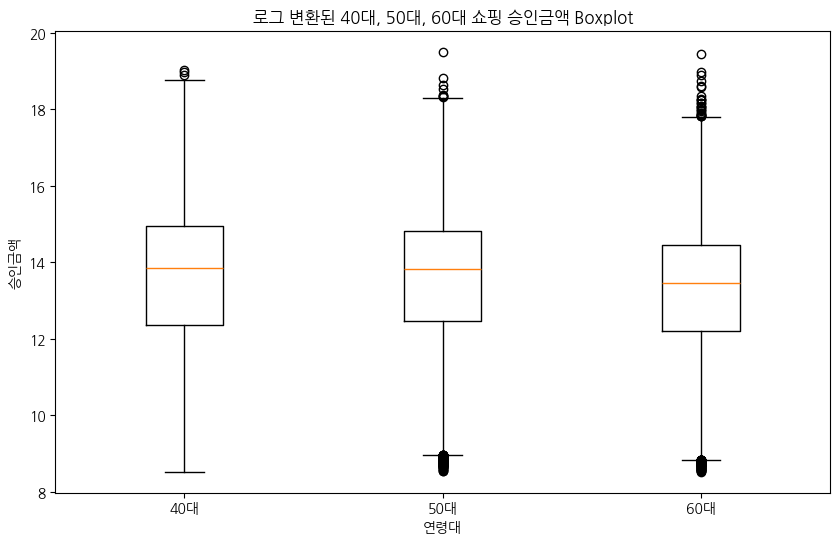

In [50]:
# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_shop = np.log1p(cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액'])
cc_22_50_shop = np.log1p(cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액'])
cc_22_60_shop = np.log1p(cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액'])
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_shop, cc_22_50_shop, cc_22_60_shop]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

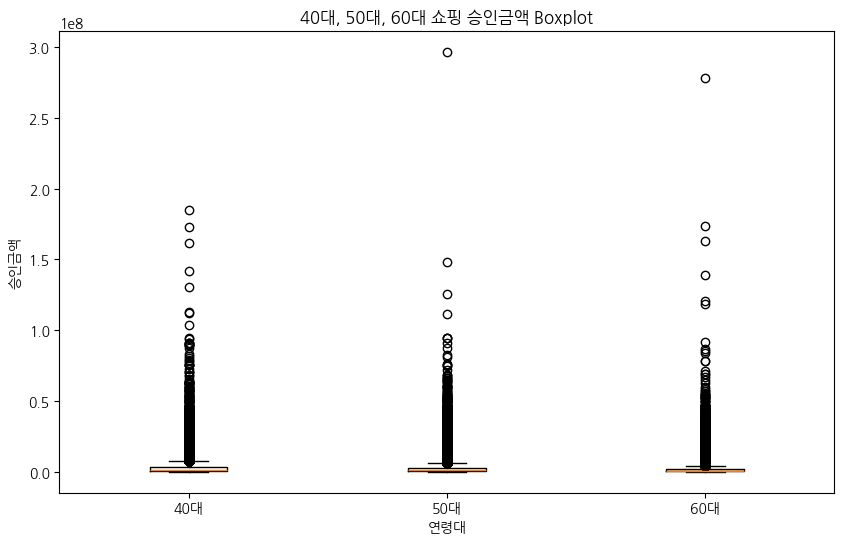

In [51]:
# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_shop = cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액']
cc_22_50_shop = cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액']
cc_22_60_shop = cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액']
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_shop, cc_22_50_shop, cc_22_60_shop]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

## 생활비

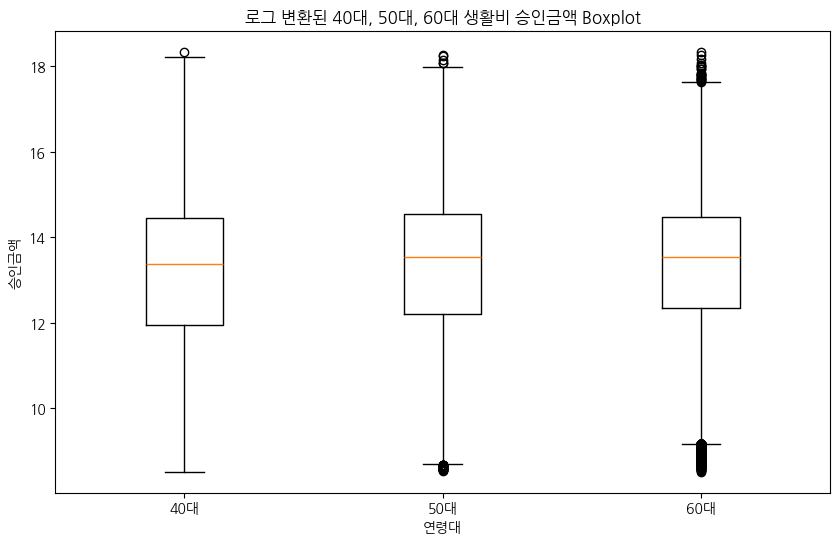

In [52]:
# '분류' 컬럼이 '생활비'인 데이터의 '승인금액'만 추출
cc_22_40_life = np.log1p(cc_22_40_g[cc_22_40_g['분류'] == '생활비']['승인금액'])
cc_22_50_life = np.log1p(cc_22_50_g[cc_22_50_g['분류'] == '생활비']['승인금액'])
cc_22_60_life = np.log1p(cc_22_60_g[cc_22_60_g['분류'] == '생활비']['승인금액'])
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_life, cc_22_50_life, cc_22_60_life]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 생활비 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

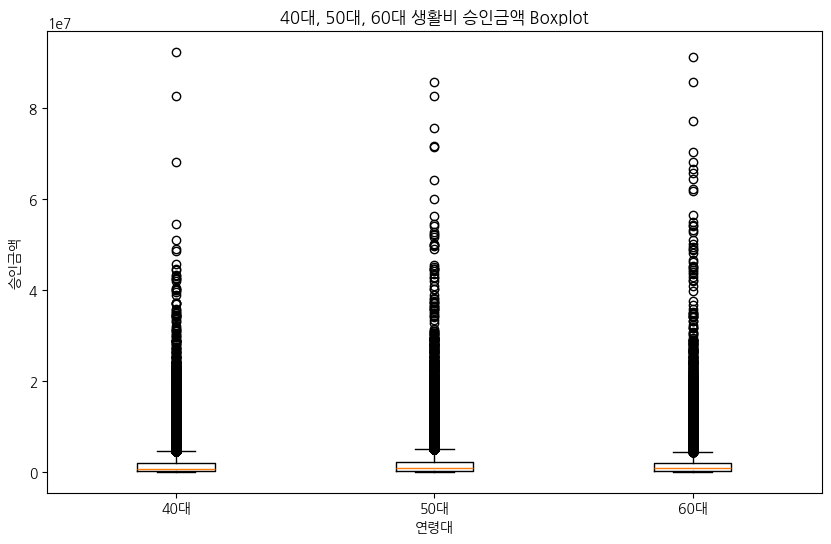

In [53]:
# '분류' 컬럼이 '생활비'인 데이터의 '승인금액'만 추출
cc_22_40_life = cc_22_40_g[cc_22_40_g['분류'] == '생활비']['승인금액']
cc_22_50_life = cc_22_50_g[cc_22_50_g['분류'] == '생활비']['승인금액']
cc_22_60_life = cc_22_60_g[cc_22_60_g['분류'] == '생활비']['승인금액']
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_life, cc_22_50_life, cc_22_60_life]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('40대, 50대, 60대 생활비 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

## 식음료

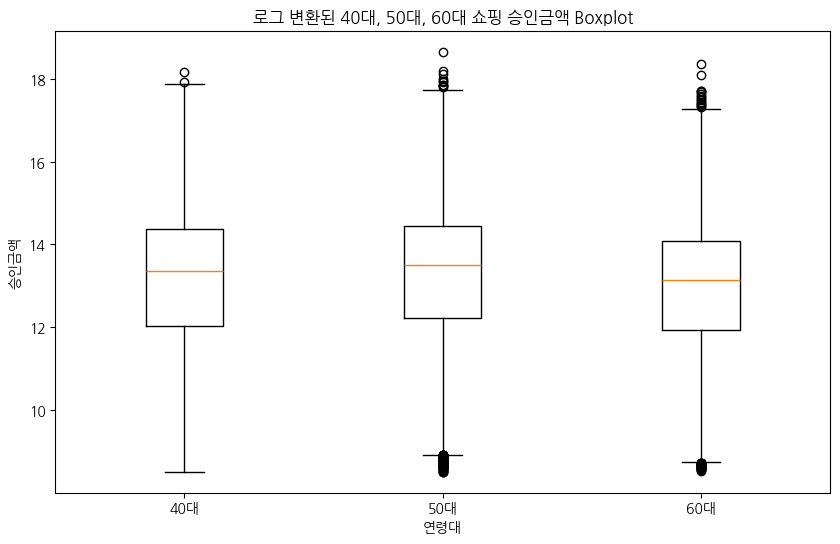

In [54]:
# '분류' 컬럼이 '식음료'인 데이터의 '승인금액'만 추출
cc_22_40_fnb = np.log1p(cc_22_40_g[cc_22_40_g['분류'] == '식음료']['승인금액'])
cc_22_50_fnb = np.log1p(cc_22_50_g[cc_22_50_g['분류'] == '식음료']['승인금액'])
cc_22_60_fnb = np.log1p(cc_22_60_g[cc_22_60_g['분류'] == '식음료']['승인금액'])
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_fnb, cc_22_50_fnb, cc_22_60_fnb]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

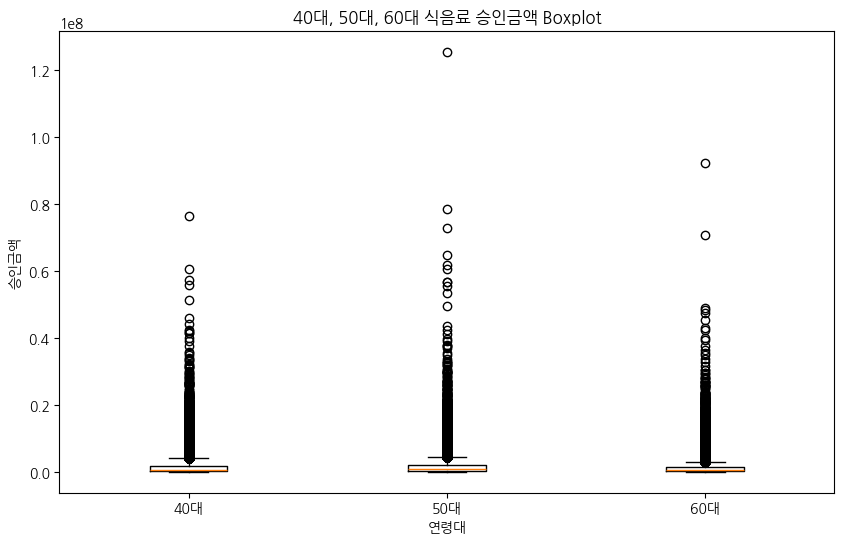

In [55]:
# '분류' 컬럼이 '식음료'인 데이터의 '승인금액'만 추출
cc_22_40_life = cc_22_40_g[cc_22_40_g['분류'] == '식음료']['승인금액']
cc_22_50_life = cc_22_50_g[cc_22_50_g['분류'] == '식음료']['승인금액']
cc_22_60_life = cc_22_60_g[cc_22_60_g['분류'] == '식음료']['승인금액']
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_life, cc_22_50_life, cc_22_60_life]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('40대, 50대, 60대 식음료 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

## 여가

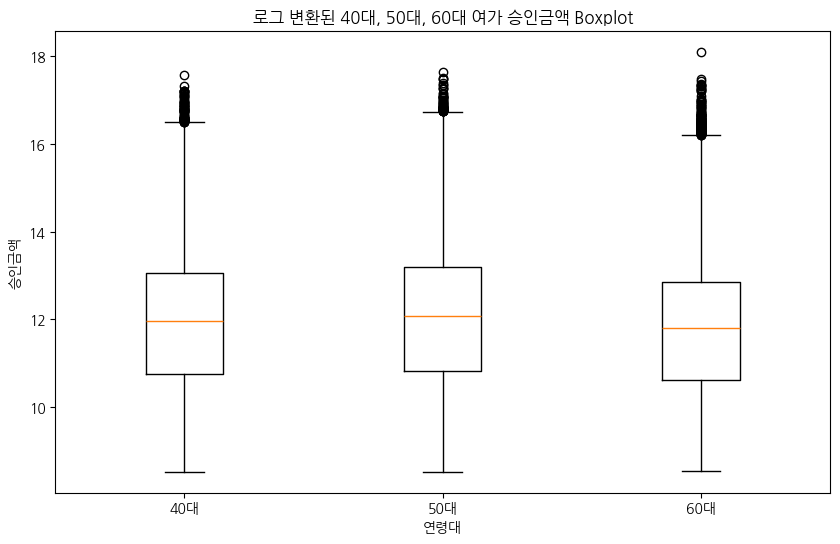

In [56]:
# '분류' 컬럼이 '여가'인 데이터의 '승인금액'만 추출
cc_22_40_fnb = np.log1p(cc_22_40_g[cc_22_40_g['분류'] == '여가']['승인금액'])
cc_22_50_fnb = np.log1p(cc_22_50_g[cc_22_50_g['분류'] == '여가']['승인금액'])
cc_22_60_fnb = np.log1p(cc_22_60_g[cc_22_60_g['분류'] == '여가']['승인금액'])
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_fnb, cc_22_50_fnb, cc_22_60_fnb]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 여가 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

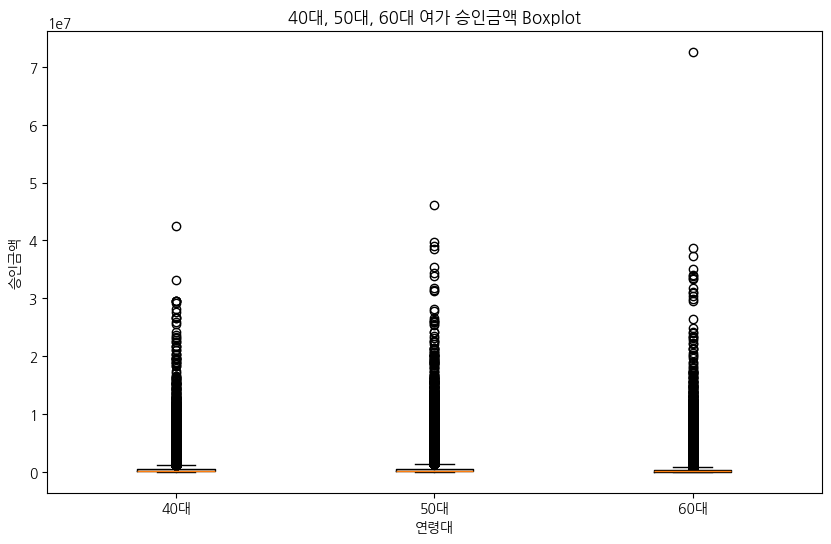

In [57]:
# '분류' 컬럼이 '여가'인 데이터의 '승인금액'만 추출
cc_22_40_fnb = cc_22_40_g[cc_22_40_g['분류'] == '여가']['승인금액']
cc_22_50_fnb = cc_22_50_g[cc_22_50_g['분류'] == '여가']['승인금액']
cc_22_60_fnb = cc_22_60_g[cc_22_60_g['분류'] == '여가']['승인금액']
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_fnb, cc_22_50_fnb, cc_22_60_fnb]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('40대, 50대, 60대 여가 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

# 일원분산분석

## 층화추출

In [76]:
# 고객 ID당 분류별 승인금액 합계 구하기
cc_22_40_sum = cc_22_40_r.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
cc_22_50_sum = cc_22_50_r.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
cc_22_60_sum = cc_22_60_r.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
# 연령대 추가
cc_22_40_sum['연령대'] = '40대'
cc_22_50_sum['연령대'] = '50대'
cc_22_60_sum['연령대'] = '60대'
# 세 데이터를 하나로 결합
combined_data_22 = pd.concat([cc_22_40_sum, cc_22_50_sum, cc_22_60_sum])
combined_data_22 = combined_data_22.drop(columns=['고객ID'])
# 각 분류별 전체 건수와 연령대 비율 계산
total_counts = combined_data_22.groupby('분류').size()
age_counts = combined_data_22.groupby(['분류', '연령대']).size()
age_percentage = (age_counts / total_counts).unstack().fillna(0)
# 결과를 저장할 데이터프레임 초기화
sampled_data = pd.DataFrame()
# 각 분류별로 10,000개씩 샘플링
for category in age_percentage.index:
    category_data = combined_data_22[combined_data_22['분류'] == category]  # 해당 분류 데이터 필터링
    # 연령대별로 비율에 맞춰 샘플 개수 계산
    sample_counts = (age_percentage.loc[category] * 10000).round().astype(int)
    # 각 연령대에서 샘플 추출
    for age_group, count in sample_counts.items():
        age_data = category_data[category_data['연령대'] == age_group]
        # 데이터가 부족한 경우, 전체 데이터 사용
        sample_size = min(count, len(age_data))
        # 연령대별 샘플을 랜덤으로 추출하고 결합
        sampled_data = pd.concat([sampled_data, age_data.sample(sample_size, random_state=42)])
# 결과 확인
sampled_data.reset_index(drop=True, inplace=True)
sampled_data

,분류,승인금액,연령대
0,기타,175077,40대
1,기타,12130,40대
2,기타,401115,40대
3,기타,59504,40대
4,기타,1354665,40대
...,...,...,...
49994,여가,237679,60대
49995,여가,48265,60대
49996,여가,1730234,60대
49997,여가,23662,60대


## 층화추출 참고 함수 코드 - 고쳐야함

In [77]:
def strat(df, feature1, feature2, target):
    df_groupby = df.groupby([feature1, feature2])[target].sum().reset_index()
    df_drop = df_groupby.drop(columns=[feature1])
    counts = df_drop[feature2].value_counts()
    total_count = len(df_drop)
    sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
    sample_df = df.groupby(feature2, group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
    )
    aver_sample = sample_df.groupby(feature2)[target].mean()
    pd.options.display.float_format = '{:,.0f}'.format
    print(f"{feature2}별 연간 {target} 평균:")
    return aver_sample  # 반환값 추가

def strat(df, feature1, feature2, target):
    """
    주어진 데이터프레임에서 지정된 기준으로 그룹화하고, 각 그룹에서 표본을 추출하여
    target 변수의 평균을 계산하는 함수입니다.

    매개변수:
    df (pd.DataFrame): 분석에 사용할 데이터프레임입니다.
    feature1 (str): 그룹화에 사용할 첫 번째 기준 컬럼입니다.
    feature2 (str): 그룹화에 사용할 두 번째 기준 컬럼입니다.
    target (str): 평균을 계산할 대상 컬럼입니다.

    반환값:
    pd.Series: feature2별로 계산된 target의 연간 평균을 반환합니다.

    예제:
    aver_sample = strat(df, '고객ID', '분류', '승인금액')

    설명:
    이 함수는 feature1과 feature2로 그룹화하여 target의 총합을 계산한 후, 
    feature2의 각 그룹에서 임의로 표본을 추출하여 target의 평균을 계산합니다.
    표본 크기는 각 그룹의 데이터 수에 따라 비율로 설정되며, 
    총 표본 수는 10,000개로 기본 설정되어 있습니다.
    최종적으로 feature2별 target의 연간 평균을 출력하고 반환합니다.
    """
    df_groupby = df.groupby([feature1, feature2])[target].sum().reset_index()
    df_drop = df_groupby.drop(columns=[feature1])
    counts = df_drop[feature2].value_counts()
    total_count = len(df_drop)
    sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
    sample_df = df.groupby(feature2, group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
    )
    aver_sample = sample_df.groupby(feature2)[target].mean()
    pd.options.display.float_format = '{:,.0f}'.format
    print(f"{feature2}별 연간 {target} 평균:")
    return aver_sample  # 반환값 추가


def strat_new(df, feature1, feature2, target):
    """
    주어진 데이터프레임에서 지정된 기준으로 그룹화하고, 각 그룹에서 표본을 추출하여
    target 변수의 평균을 계산하는 함수입니다.

    매개변수:
    df (pd.DataFrame): 분석에 사용할 데이터프레임입니다.
    feature1 (str): 그룹화에 사용할 첫 번째 기준 컬럼입니다.
    feature2 (str): 그룹화에 사용할 두 번째 기준 컬럼입니다.
    target (str): 평균을 계산할 대상 컬럼입니다.

    반환값:
    pd.Series: feature2별로 계산된 target의 연간 평균을 반환합니다.

    예제:
    aver_sample = strat(df, '고객ID', '분류', '승인금액')

    설명:
    이 함수는 feature1과 feature2로 그룹화하여 target의 총합을 계산한 후, 
    feature2의 각 그룹에서 임의로 표본을 추출하여 target의 평균을 계산합니다.
    표본 크기는 각 그룹의 데이터 수에 따라 비율로 설정되며, 
    총 표본 수는 10,000개로 기본 설정되어 있습니다.
    최종적으로 feature2별 target의 연간 평균을 출력하고 반환합니다.
    """
    df_groupby = df.groupby([feature1, feature2])[target].sum().reset_index()
    df_drop = df_groupby.drop(columns=[feature1])
    counts = df_drop[feature2].value_counts()
    total_count = len(df_drop)
    sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
    sample_df = df.groupby(feature2, group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
    )
    aver_sample = sample_df.groupby(feature2)[target].mean()
    pd.options.display.float_format = '{:,.0f}'.format
    print(f"{feature2}별 연간 {target} 평균:")
    return aver_sample  # 반환값 추가


## 정규성 검정

In [78]:
from scipy.stats import shapiro

# categories 변수 정의
categories = sampled_data['분류'].unique()

# 정규성 검정
for category in categories:
    category_data = sampled_data[sampled_data['분류'] == category]
    print(f"\n{category} 카테고리:")

    for age_group in category_data['연령대'].unique():
        group_data = category_data[category_data['연령대'] == age_group]['승인금액']
        stat, p_value = shapiro(group_data)
        
        if p_value > 0.05:
            print(f"{age_group}: 정규성을 가정할 수 있습니다 (p-value = {p_value:.30f}).")
        else:
            print(f"{age_group}: 정규성을 가정할 수 없습니다 (p-value = {p_value:.30f}).")



기타 카테고리:
40대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).
50대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).
60대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).

생활비 카테고리:
40대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).
50대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).
60대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).

쇼핑 카테고리:
40대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).
50대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).
60대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).

식음료 카테고리:
40대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).
50대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).
60대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).

여가 카테고리:
40대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).
50대: 정규성을 가정할 수 없습니다 (p-value = 0.000000000000000000000000000000).
60대: 정규성을 

## 등분산성 검정

In [79]:
from scipy.stats import levene

# 등분산성 검정
for category in categories:
    category_data = sampled_data[sampled_data['분류'] == category]
    group_data = [category_data[category_data['연령대'] == age_group]['승인금액'] for age_group in category_data['연령대'].unique()]
    stat, p_value = levene(*group_data)
    
    if p_value > 0.05:
        print(f"{category} 카테고리는 등분산성을 가정할 수 있습니다 (p-value = {p_value:.10f}).")
    else:
        print(f"{category} 카테고리는 등분산성을 가정할 수 없습니다 (p-value = {p_value:.10f}).")


기타 카테고리는 등분산성을 가정할 수 있습니다 (p-value = 0.2472559686).
생활비 카테고리는 등분산성을 가정할 수 없습니다 (p-value = 0.0011364707).
쇼핑 카테고리는 등분산성을 가정할 수 없습니다 (p-value = 0.0000000000).
식음료 카테고리는 등분산성을 가정할 수 없습니다 (p-value = 0.0000000000).
여가 카테고리는 등분산성을 가정할 수 없습니다 (p-value = 0.0000000083).


## welch - anova

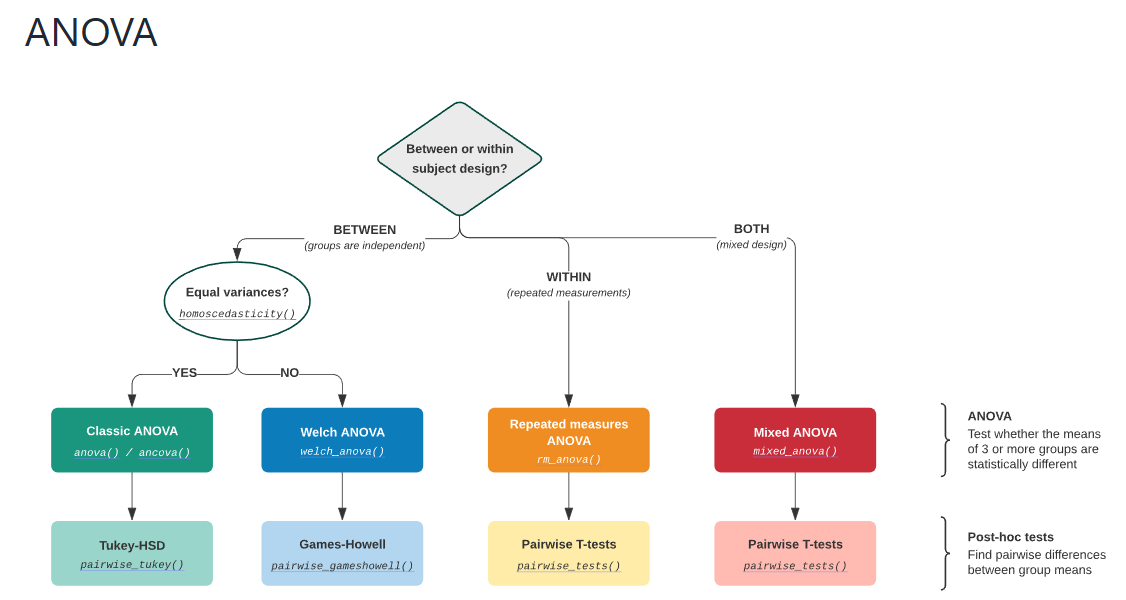

In [80]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
# 데이터 불러오기
# sampled_data = pd.read_csv("your_data.csv")  # 이미 데이터가 있다면 필요 없음
# 모델 정의
model = ols('승인금액 ~ C(연령대)', data=sampled_data).fit()
# Welch's ANOVA 수행
anova_table = sm.stats.anova_lm(model, typ=2, robust='hc3')  # 'hc3'는 Welch의 방법 중 하나
print(anova_table)

                sum_sq       df          F        PR(>F)
C(연령대)    6.268599e+14      2.0  57.791189  8.522611e-26
Residual  2.711528e+17  49996.0        NaN           NaN


## 등분산 검정이랑 welch anova 같이

In [82]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene

# 예제 데이터 (sampled_data가 주어졌다고 가정)
# categories 변수 정의
categories = sampled_data['분류'].unique()

# 각 카테고리별로 Levene's Test와 Welch ANOVA 수행
for category in categories:
    # 특정 카테고리의 데이터 필터링
    category_data = sampled_data[sampled_data['분류'] == category]
    
    # 연령대별 승인금액 데이터를 그룹화
    group_data = [category_data[category_data['연령대'] == age_group]['승인금액'] for age_group in category_data['연령대'].unique()]
    
    # Levene's Test 수행
    stat, p_value = levene(*group_data)
    
    print(f"\n{category} 카테고리 - Levene's Test 결과:")
    if p_value > 0.05:
        print(f"등분산성을 가정할 수 있습니다 (p-value = {p_value:.4f}). 일반 ANOVA를 사용합니다.")
        
        # 일반 ANOVA 수행
        model = ols('승인금액 ~ C(연령대)', data=category_data).fit()
        anova_result = sm.stats.anova_lm(model, typ=2)
        print("일반 ANOVA 결과:\n", anova_result)
    
    else:
        print(f"등분산성을 가정할 수 없습니다 (p-value = {p_value:.4f}). Welch ANOVA를 사용합니다.")
        
        # Welch ANOVA 수행
        model = ols('승인금액 ~ C(연령대)', data=category_data).fit()
        welch_anova_result = sm.stats.anova_lm(model, typ=2, robust='hc3')
        print("Welch ANOVA 결과:\n", welch_anova_result)



기타 카테고리 - Levene's Test 결과:
등분산성을 가정할 수 있습니다 (p-value = 0.2473). 일반 ANOVA를 사용합니다.
일반 ANOVA 결과:
                 sum_sq      df         F    PR(>F)
C(연령대)    1.792980e+13     2.0  1.865098  0.154935
Residual  4.805223e+16  9997.0       NaN       NaN

생활비 카테고리 - Levene's Test 결과:
등분산성을 가정할 수 없습니다 (p-value = 0.0011). Welch ANOVA를 사용합니다.
Welch ANOVA 결과:
                 sum_sq      df         F    PR(>F)
C(연령대)    3.513946e+13     2.0  3.004241  0.049621
Residual  5.846554e+16  9997.0       NaN       NaN

쇼핑 카테고리 - Levene's Test 결과:
등분산성을 가정할 수 없습니다 (p-value = 0.0000). Welch ANOVA를 사용합니다.
Welch ANOVA 결과:
                 sum_sq      df          F        PR(>F)
C(연령대)    1.038721e+15     2.0  51.682255  4.676671e-23
Residual  1.004508e+17  9996.0        NaN           NaN

식음료 카테고리 - Levene's Test 결과:
등분산성을 가정할 수 없습니다 (p-value = 0.0000). Welch ANOVA를 사용합니다.
Welch ANOVA 결과:
                 sum_sq      df          F        PR(>F)
C(연령대)    2.808015e+14     2.0  38.705558  1.799442e-17
Residu

In [83]:
from scipy import stats
# Welch's ANOVA를 각 '분류'별로 '연령대'에 따른 '승인금액'의 평균 차이 분석 함수
def welchs_anova_by_category(data, category_column, age_column, amount_column):
    anova_results = {}
    for category in data[category_column].unique():
        # 각 분류에 해당하는 데이터 추출
        category_data = data[data[category_column] == category]
        # 연령대별로 승인금액 그룹화
        age_40 = category_data[category_data[age_column] == '40대'][amount_column]
        age_50 = category_data[category_data[age_column] == '50대'][amount_column]
        age_60 = category_data[category_data[age_column] == '60대'][amount_column]
        # Welch's ANOVA 수행
        welch_anova = stats.f_oneway(age_40, age_50, age_60)
        anova_results[category] = {
            "statistic": welch_anova.statistic,
            "p_value": welch_anova.pvalue
        }
    return anova_results
# Welch's ANOVA 결과 출력
anova_results = welchs_anova_by_category(
    data=sampled_data,
    category_column='분류',
    age_column='연령대',
    amount_column='승인금액'
)
for category, result in anova_results.items():
    print(f"분류: {category}, 통계량: {result['statistic']}, p-value: {result['p_value']}")

분류: 기타, 통계량: 1.8650977611639161, p-value: 0.15493495669653753
분류: 생활비, 통계량: 2.7598202547923756, p-value: 0.06335137638495995
분류: 쇼핑, 통계량: 45.2436229218537, p-value: 2.7500851994398454e-20
분류: 식음료, 통계량: 37.88753259974093, p-value: 4.052289725213662e-17
분류: 여가, 통계량: 20.403737023955866, p-value: 1.434848938955765e-09


In [84]:
import pingouin as pg  # Welch's ANOVA를 제공하는 라이브러리
# 샘플 데이터가 정의되어 있다고 가정하고 Welch's ANOVA 수행 함수 작성
def welchs_anova_by_category(data, category_column, age_column, amount_column):
    anova_results = {}
    for category in data[category_column].unique():
        # 각 분류에 해당하는 데이터 추출
        category_data = data[data[category_column] == category]
        # Welch's ANOVA 수행
        welch_anova = pg.welch_anova(dv=amount_column, between=age_column, data=category_data)
        anova_results[category] = {
            "statistic": welch_anova['F'].values[0],
            "p_value": welch_anova['p-unc'].values[0]
        }
    return anova_results
# Welch's ANOVA 결과 출력
anova_results = welchs_anova_by_category(
    data=sampled_data,
    category_column='분류',
    age_column='연령대',
    amount_column='승인금액'
)
for category, result in anova_results.items():
    print(f"분류: {category}, 통계량: {result['statistic']}, p-value: {result['p_value']}")

분류: 기타, 통계량: 1.6563597819396814, p-value: 0.1909109461382971
분류: 생활비, 통계량: 3.004774844804363, p-value: 0.049621535823314585
분류: 쇼핑, 통계량: 51.692335946084526, p-value: 5.409382438474634e-23
분류: 식음료, 통계량: 38.71252127472131, p-value: 1.936773865248824e-17
분류: 여가, 통계량: 17.858783340405438, p-value: 1.8397980420242834e-08


In [85]:
import pingouin as pg  # Welch's ANOVA를 제공하는 라이브러리
# 샘플 데이터가 정의되어 있다고 가정하고 Welch's ANOVA 수행 함수 작성
def welchs_anova_by_category(data, category_column, age_column, amount_column):
    anova_results = {}
    for category in data[category_column].unique():
        # 각 분류에 해당하는 데이터 추출
        category_data = data[data[category_column] == category]
        # Welch's ANOVA 수행
        welch_anova = pg.welch_anova(dv=amount_column, between=age_column, data=category_data)
        anova_results[category] = {
            "statistic": welch_anova['F'].values[0],
            "p_value": welch_anova['p-unc'].values[0]
        }
    return anova_results
# Welch's ANOVA 결과 출력
anova_results = welchs_anova_by_category(
    data=sampled_data,
    category_column='분류',
    age_column='연령대',
    amount_column='승인금액'
)
for category, result in anova_results.items():
    print(f"분류: {category}, 통계량: {result['statistic']}, p-value: {result['p_value']}")

분류: 기타, 통계량: 1.6563597819396814, p-value: 0.1909109461382971
분류: 생활비, 통계량: 3.004774844804363, p-value: 0.049621535823314585
분류: 쇼핑, 통계량: 51.692335946084526, p-value: 5.409382438474634e-23
분류: 식음료, 통계량: 38.71252127472131, p-value: 1.936773865248824e-17
분류: 여가, 통계량: 17.858783340405438, p-value: 1.8397980420242834e-08


In [86]:
import pingouin as pg  # Welch's ANOVA를 제공하는 라이브러리
# 샘플 데이터가 정의되어 있다고 가정하고 Welch's ANOVA 수행 함수 작성
def welchs_anova_by_category(data, category_column, age_column, amount_column):
    anova_results = {}
    for category in data[category_column].unique():
        # 각 분류에 해당하는 데이터 추출
        category_data = data[data[category_column] == category]
        # Welch's ANOVA 수행
        welch_anova = pg.welch_anova(dv=amount_column, between=age_column, data=category_data)
        anova_results[category] = {
            "statistic": welch_anova['F'].values[0],
            "p_value": welch_anova['p-unc'].values[0]
        }
    return anova_results
# Welch's ANOVA 결과 출력
anova_results = welchs_anova_by_category(
    data=sampled_data,
    category_column='분류',
    age_column='연령대',
    amount_column='승인금액'
)
for category, result in anova_results.items():
    print(f"분류: {category}, 통계량: {result['statistic']}, p-value: {result['p_value']}")

분류: 기타, 통계량: 1.6563597819396814, p-value: 0.1909109461382971
분류: 생활비, 통계량: 3.004774844804363, p-value: 0.049621535823314585
분류: 쇼핑, 통계량: 51.692335946084526, p-value: 5.409382438474634e-23
분류: 식음료, 통계량: 38.71252127472131, p-value: 1.936773865248824e-17
분류: 여가, 통계량: 17.858783340405438, p-value: 1.8397980420242834e-08


# 박스플롯 함수 만들기

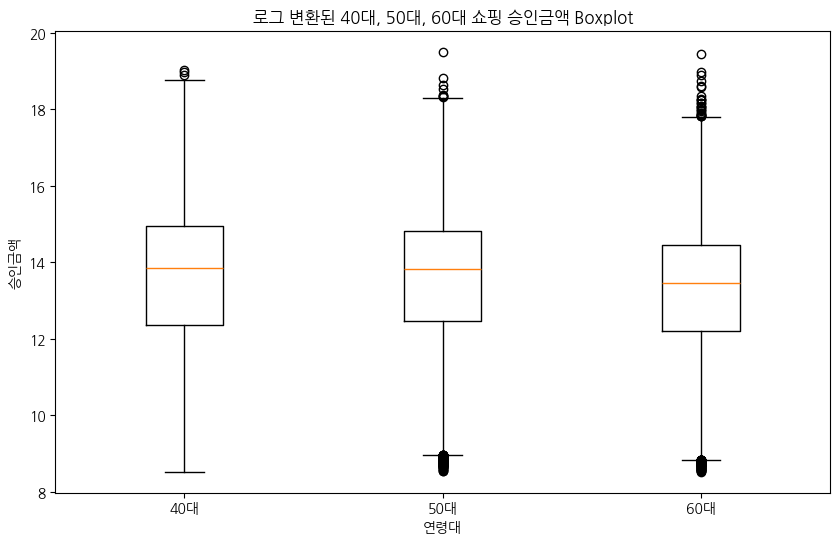

In [87]:
# 고객 ID와 분류별 승인금액 합계 구하기
cc_22_40_g = cc_22_40_r.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
cc_22_50_g = cc_22_50_r.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
cc_22_60_g = cc_22_60_r.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()

# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_shop = np.log1p(cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액'])
cc_22_50_shop = np.log1p(cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액'])
cc_22_60_shop = np.log1p(cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액'])
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_shop, cc_22_50_shop, cc_22_60_shop]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

In [88]:
def boxplots_log_test(df1, df2, df3, category, feature, target, year):
    df1_g = df1.groupby(['고객ID', category])[target].sum().reset_index()
    df2_g = df2.groupby(['고객ID', category])[target].sum().reset_index()
    df3_g = df3.groupby(['고객ID', category])[target].sum().reset_index()

    df1_log = np.log1p(df1_g[df1_g[category] == feature][target])
    df2_log = np.log1p(df2_g[df2_g[category] == feature][target])
    df3_log = np.log1p(df3_g[df3_g[category] == feature][target])
    data = [df1_log, df2_log, df3_log]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(data, labels=['40대', '50대', '60대'])
    ax.set_title(f"로그 변환된 {year}년도 고객ID 당 분류 중 `{target}` 승인금액 합계 ")
    ax.set_xlabel("연령대")
    ax.set_ylabel("승인금액 합계")
    plt.show()
    return

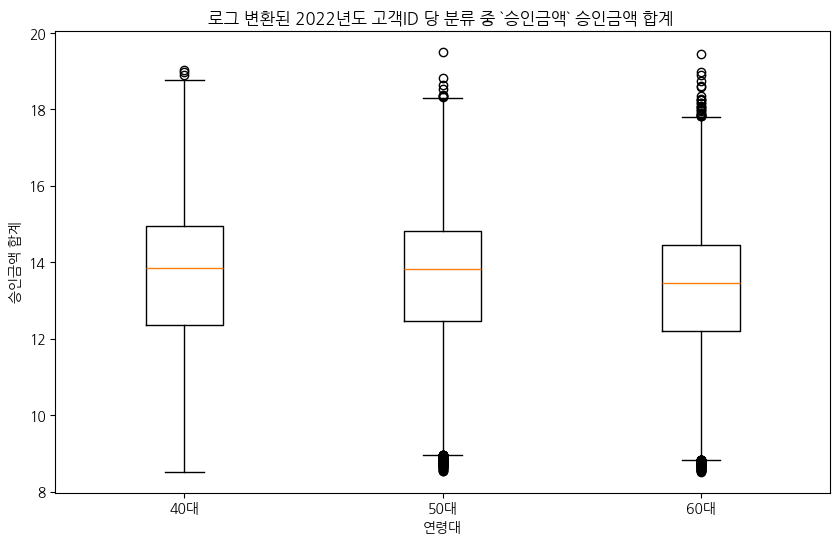

In [89]:
boxplots_log_test(cc_22_40_r, cc_22_50_r, cc_22_60_r, category='분류', target='승인금액', feature='쇼핑', year="2022")

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def boxplot_log(dataframes, category, target, feature, year=None):
    log_data = []
    
    for df in dataframes:
        df_group = df.groupby(['고객ID', category])[target].sum().reset_index()
        log_data.append(np.log1p(df_group[df_group[category] == feature][target]))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(log_data, labels=['40대', '50대', '60대'])
    ax.set_title(f"로그 변환된 {year}년도 고객ID 당 분류 중 `{target}` 승인금액 합계 ")
    ax.set_xlabel('연령대')
    ax.set_ylabel('승인금액')
    plt.show()
    return


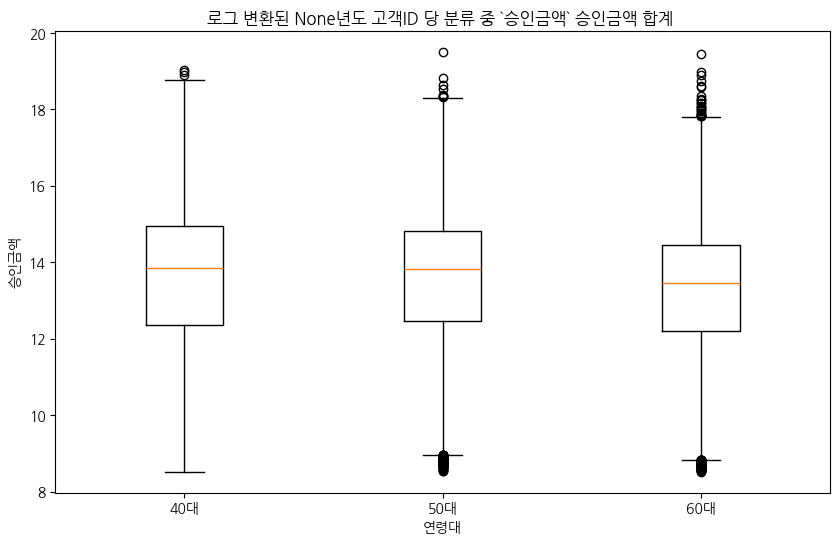

In [91]:
# 함수 사용 예시
boxplot_log([cc_22_40_r, cc_22_50_r, cc_22_60_r], category='분류', target='승인금액', feature='쇼핑')

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def boxplot_log_title(dataframes, category, target, feature, year=None):
    log_data = []
    for df in dataframes:
        df_group = df.groupby([category])[target].sum().reset_index()
        log_data.append(np.log1p(df_group[df_group[category] == feature][target]))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(log_data, labels=['40대', '50대', '60대'])
    
    # year가 None이면 제목에 year를 생략
    title = f"로그 변환된 고객ID 당 분류 중 `{target}` 승인금액 합계"
    if year is not None:
        title = f"로그 변환된 {year}년도 고객ID 당 분류 중 `{target}` 승인금액 합계"
    ax.set_title(title)
    
    ax.set_xlabel('연령대')
    ax.set_ylabel('승인금액')
    plt.show()
    return


In [93]:
import pingouin as pg  # Games-Howell 사후 검정을 제공하는 라이브러리

def welchs_anova_by_category(data, category_column, age_column, amount_column):
    anova_results = {}
    posthoc_results = {}

    for category in data[category_column].unique():
        # 각 분류에 해당하는 데이터 추출
        category_data = data[data[category_column] == category]
        
        # Welch's ANOVA 수행
        welch_anova = pg.welch_anova(dv=amount_column, between=age_column, data=category_data)
        anova_results[category] = {
            "statistic": welch_anova['F'].values[0],
            "p_value": welch_anova['p-unc'].values[0]
        }

        # Games-Howell 사후 검정 수행
        posthoc = pg.pairwise_gameshowell(dv=amount_column, between=age_column, data=category_data)
        posthoc_results[category] = posthoc

    return anova_results, posthoc_results

# Welch's ANOVA와 사후 검정 결과 출력
anova_results, posthoc_results = welchs_anova_by_category(
    data=sampled_data,
    category_column='분류',
    age_column='연령대',
    amount_column='승인금액'
)

# ANOVA 결과 출력
for category, result in anova_results.items():
    print(f"분류: {category}, 통계량: {result['statistic']}, p-value: {result['p_value']}")

# Games-Howell 사후 검정 결과 출력
print("\nGames-Howell 사후 검정 결과:")
for category, posthoc in posthoc_results.items():
    print(f"\n분류: {category}")
    print(posthoc)


분류: 기타, 통계량: 1.6563597819396814, p-value: 0.1909109461382971
분류: 생활비, 통계량: 3.004774844804363, p-value: 0.049621535823314585
분류: 쇼핑, 통계량: 51.692335946084526, p-value: 5.409382438474634e-23
분류: 식음료, 통계량: 38.71252127472131, p-value: 1.936773865248824e-17
분류: 여가, 통계량: 17.858783340405438, p-value: 1.8397980420242834e-08

Games-Howell 사후 검정 결과:

분류: 기타
     A    B        mean(A)        mean(B)          diff            se  \
0  40대  50대  837113.706634  904649.843812 -67536.137178  50637.898865   
1  40대  60대  837113.706634  806526.003853  30587.702781  50907.209986   
2  50대  60대  904649.843812  806526.003853  98123.839959  55596.387635   

          T           df      pval    hedges  
0 -1.333707  6322.617591  0.376463 -0.032504  
1  0.600852  6412.439556  0.819644  0.014478  
2  1.764932  7178.923169  0.181569  0.041643  

분류: 생활비
     A    B       mean(A)       mean(B)           diff            se  \
0  40대  50대  1.585612e+06  1.598826e+06  -13214.541863  64997.003068   
1  40대  60대  1.58

In [94]:
import pandas as pd
import pingouin as pg  # Games-Howell 사후 검정을 제공하는 라이브러리

def welchs_anova_by_category(data, category_column, age_column, amount_column):
    anova_results = []
    posthoc_results = {}

    for category in data[category_column].unique():
        # 각 분류에 해당하는 데이터 추출
        category_data = data[data[category_column] == category]
        
        # Welch's ANOVA 수행
        welch_anova = pg.welch_anova(dv=amount_column, between=age_column, data=category_data)
        anova_results.append({
            "category": category,
            "statistic": welch_anova['F'].values[0],
            "p_value": welch_anova['p-unc'].values[0]
        })

        # Games-Howell 사후 검정 수행
        posthoc = pg.pairwise_gameshowell(dv=amount_column, between=age_column, data=category_data)
        posthoc['category'] = category  # 카테고리 열 추가
        posthoc_results[category] = posthoc

    # ANOVA 결과를 데이터프레임으로 변환
    anova_results_df = pd.DataFrame(anova_results)
    
    # 사후 검정 결과를 하나의 데이터프레임으로 병합
    posthoc_results_df = pd.concat(posthoc_results.values(), ignore_index=True)
    
    return anova_results_df, posthoc_results_df

# Welch's ANOVA와 사후 검정 결과 출력
anova_results_df, posthoc_results_df = welchs_anova_by_category(
    data=sampled_data,
    category_column='분류',
    age_column='연령대',
    amount_column='승인금액'
)

# ANOVA 결과 출력
print("Welch's ANOVA 결과:")
print(anova_results_df)

# Games-Howell 사후 검정 결과 출력
print("\nGames-Howell 사후 검정 결과:")
print(posthoc_results_df)


Welch's ANOVA 결과:
  category  statistic       p_value
0       기타   1.656360  1.909109e-01
1      생활비   3.004775  4.962154e-02
2       쇼핑  51.692336  5.409382e-23
3      식음료  38.712521  1.936774e-17
4       여가  17.858783  1.839798e-08

Games-Howell 사후 검정 결과:
      A    B       mean(A)       mean(B)           diff            se  \
0   40대  50대  8.371137e+05  9.046498e+05  -67536.137178  50637.898865   
1   40대  60대  8.371137e+05  8.065260e+05   30587.702781  50907.209986   
2   50대  60대  9.046498e+05  8.065260e+05   98123.839959  55596.387635   
3   40대  50대  1.585612e+06  1.598826e+06  -13214.541863  64997.003068   
4   40대  60대  1.585612e+06  1.475825e+06  109786.393984  63249.691778   
5   50대  60대  1.598826e+06  1.475825e+06  123000.935847  54051.293668   
6   40대  50대  2.240207e+06  2.103306e+06  136900.610008  86582.145486   
7   40대  60대  2.240207e+06  1.545761e+06  694445.148441  79255.966957   
8   50대  60대  2.103306e+06  1.545761e+06  557544.538433  71131.661702   
9   40대  50대

In [95]:
posthoc_results_df

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,category
0,40대,50대,8.371137e+05,9.046498e+05,-67536.137178,50637.898865,-1.333707,6322.617591,3.764632e-01,-0.032504,기타
1,40대,60대,8.371137e+05,8.065260e+05,30587.702781,50907.209986,0.600852,6412.439556,8.196440e-01,0.014478,기타
2,50대,60대,9.046498e+05,8.065260e+05,98123.839959,55596.387635,1.764932,7178.923169,1.815692e-01,0.041643,기타
3,40대,50대,1.585612e+06,1.598826e+06,-13214.541863,64997.003068,-0.203310,5531.794211,9.774706e-01,-0.005244,생활비
4,40대,60대,1.585612e+06,1.475825e+06,109786.393984,63249.691778,1.735762,5316.338182,1.919734e-01,0.044694,생활비
5,50대,60대,1.598826e+06,1.475825e+06,123000.935847,54051.293668,2.275634,7126.928075,5.932163e-02,0.053698,생활비
6,40대,50대,2.240207e+06,2.103306e+06,136900.610008,86582.145486,1.581164,6048.888703,2.538519e-01,0.039808,쇼핑
7,40대,60대,2.240207e+06,1.545761e+06,694445.148441,79255.966957,8.762055,5236.407235,0.000000e+00,0.225199,쇼핑
8,50대,60대,2.103306e+06,1.545761e+06,557544.538433,71131.661702,7.838205,6671.595392,0.000000e+00,0.186581,쇼핑
9,40대,50대,1.324583e+06,1.500138e+06,-175555.782083,49663.672789,-3.534893,6385.349703,1.195013e-03,-0.087511,식음료


In [97]:
import pandas as pd
import pingouin as pg  # Games-Howell 사후 검정을 제공하는 라이브러리

def welchs_anova_by_category(data, category_column, age_column, amount_column):
    anova_results = []
    posthoc_results = {}

    for category in data[category_column].unique():
        # 각 분류에 해당하는 데이터 추출
        category_data = data[data[category_column] == category]
        
        # Welch's ANOVA 수행
        welch_anova = pg.welch_anova(dv=amount_column, between=age_column, data=category_data)
        p_value = welch_anova['p-unc'].values[0]
        decision = "기각" if p_value < 0.05 else "채택"
        
        anova_results.append({
            "category": category,
            "statistic": welch_anova['F'].values[0],
            "p_value": p_value,
            "결론": f"귀무가설 {decision}"
        })

        # Games-Howell 사후 검정 수행
        posthoc = pg.pairwise_gameshowell(dv=amount_column, between=age_column, data=category_data)
        posthoc['category'] = category  # 카테고리 열 추가
        
        # 컬럼 이름 확인 후 결론 열 추가
        if 'p-val' in posthoc.columns:
            posthoc['결론'] = posthoc['p-val'].apply(lambda x: "귀무가설 기각" if x < 0.05 else "귀무가설 채택")
        elif 'p-value' in posthoc.columns:
            posthoc['결론'] = posthoc['p-value'].apply(lambda x: "귀무가설 기각" if x < 0.05 else "귀무가설 채택")
        
        posthoc_results[category] = posthoc

    # ANOVA 결과를 데이터프레임으로 변환
    anova_results_df = pd.DataFrame(anova_results)
    
    # 사후 검정 결과를 하나의 데이터프레임으로 병합
    posthoc_results_df = pd.concat(posthoc_results.values(), ignore_index=True)
    
    return anova_results_df, posthoc_results_df

# Welch's ANOVA와 사후 검정 결과 출력
anova_results_df, posthoc_results_df = welchs_anova_by_category(
    data=sampled_data,
    category_column='분류',
    age_column='연령대',
    amount_column='승인금액'
)

# ANOVA 결과 출력
print("Welch's ANOVA 결과:")
print(anova_results_df)

# Games-Howell 사후 검정 결과 출력
print("\nGames-Howell 사후 검정 결과:")
print(posthoc_results_df)


Welch's ANOVA 결과:
  category  statistic       p_value       결론
0       기타   1.656360  1.909109e-01  귀무가설 채택
1      생활비   3.004775  4.962154e-02  귀무가설 기각
2       쇼핑  51.692336  5.409382e-23  귀무가설 기각
3      식음료  38.712521  1.936774e-17  귀무가설 기각
4       여가  17.858783  1.839798e-08  귀무가설 기각

Games-Howell 사후 검정 결과:
      A    B       mean(A)       mean(B)           diff            se  \
0   40대  50대  8.371137e+05  9.046498e+05  -67536.137178  50637.898865   
1   40대  60대  8.371137e+05  8.065260e+05   30587.702781  50907.209986   
2   50대  60대  9.046498e+05  8.065260e+05   98123.839959  55596.387635   
3   40대  50대  1.585612e+06  1.598826e+06  -13214.541863  64997.003068   
4   40대  60대  1.585612e+06  1.475825e+06  109786.393984  63249.691778   
5   50대  60대  1.598826e+06  1.475825e+06  123000.935847  54051.293668   
6   40대  50대  2.240207e+06  2.103306e+06  136900.610008  86582.145486   
7   40대  60대  2.240207e+06  1.545761e+06  694445.148441  79255.966957   
8   50대  60대  2.103306e+06  1.5

In [98]:
anova_results_df

,category,statistic,p_value,결론
0,기타,1.656360,1.909109e-01,귀무가설 채택
1,생활비,3.004775,4.962154e-02,귀무가설 기각
2,쇼핑,51.692336,5.409382e-23,귀무가설 기각
3,식음료,38.712521,1.936774e-17,귀무가설 기각
4,여가,17.858783,1.839798e-08,귀무가설 기각


In [99]:
posthoc_results_df

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,category
0,40대,50대,8.371137e+05,9.046498e+05,-67536.137178,50637.898865,-1.333707,6322.617591,3.764632e-01,-0.032504,기타
1,40대,60대,8.371137e+05,8.065260e+05,30587.702781,50907.209986,0.600852,6412.439556,8.196440e-01,0.014478,기타
2,50대,60대,9.046498e+05,8.065260e+05,98123.839959,55596.387635,1.764932,7178.923169,1.815692e-01,0.041643,기타
3,40대,50대,1.585612e+06,1.598826e+06,-13214.541863,64997.003068,-0.203310,5531.794211,9.774706e-01,-0.005244,생활비
4,40대,60대,1.585612e+06,1.475825e+06,109786.393984,63249.691778,1.735762,5316.338182,1.919734e-01,0.044694,생활비
5,50대,60대,1.598826e+06,1.475825e+06,123000.935847,54051.293668,2.275634,7126.928075,5.932163e-02,0.053698,생활비
6,40대,50대,2.240207e+06,2.103306e+06,136900.610008,86582.145486,1.581164,6048.888703,2.538519e-01,0.039808,쇼핑
7,40대,60대,2.240207e+06,1.545761e+06,694445.148441,79255.966957,8.762055,5236.407235,0.000000e+00,0.225199,쇼핑
8,50대,60대,2.103306e+06,1.545761e+06,557544.538433,71131.661702,7.838205,6671.595392,0.000000e+00,0.186581,쇼핑
9,40대,50대,1.324583e+06,1.500138e+06,-175555.782083,49663.672789,-3.534893,6385.349703,1.195013e-03,-0.087511,식음료


In [100]:
import pandas as pd
import pingouin as pg  # Games-Howell 사후 검정을 제공하는 라이브러리

def welchs_anova_by_category(data, category_column, age_column, amount_column):
    anova_results = []
    posthoc_results = {}

    for category in data[category_column].unique():
        # 각 분류에 해당하는 데이터 추출
        category_data = data[data[category_column] == category]
        
        # Welch's ANOVA 수행
        welch_anova = pg.welch_anova(dv=amount_column, between=age_column, data=category_data)
        p_value = welch_anova['p-unc'].values[0]
        decision = "기각" if p_value < 0.05 else "채택"
        
        anova_results.append({
            "category": category,
            "statistic": welch_anova['F'].values[0],
            "p_value": p_value,
            "결론": f"귀무가설 {decision}"
        })

        # Games-Howell 사후 검정 수행
        posthoc = pg.pairwise_gameshowell(dv=amount_column, between=age_column, data=category_data)
        posthoc['category'] = category  # 카테고리 열 추가
        
        # 컬럼 이름 확인 후 결론 열 추가
        if 'p-val' in posthoc.columns:
            posthoc['결론'] = posthoc['p-val'].apply(lambda x: "귀무가설 기각" if x < 0.05 else "귀무가설 채택")
        elif 'p-value' in posthoc.columns:
            posthoc['결론'] = posthoc['p-value'].apply(lambda x: "귀무가설 기각" if x < 0.05 else "귀무가설 채택")
        
        posthoc_results[category] = posthoc

    # ANOVA 결과를 데이터프레임으로 변환
    anova_results_df = pd.DataFrame(anova_results)
    
    # 사후 검정 결과를 하나의 데이터프레임으로 병합
    posthoc_results_df = pd.concat(posthoc_results.values(), ignore_index=True)
    
    return anova_results_df, posthoc_results_df

# Welch's ANOVA와 사후 검정 결과 출력
anova_results_df, posthoc_results_df = welchs_anova_by_category(
    data=sampled_data,
    category_column='분류',
    age_column='연령대',
    amount_column='승인금액'
)

# ANOVA 결과 출력
print("Welch's ANOVA 결과:")
print(anova_results_df)

# Games-Howell 사후 검정 결과 출력
print("\nGames-Howell 사후 검정 결과:")
print(posthoc_results_df)


Welch's ANOVA 결과:
  category  statistic       p_value       결론
0       기타   1.656360  1.909109e-01  귀무가설 채택
1      생활비   3.004775  4.962154e-02  귀무가설 기각
2       쇼핑  51.692336  5.409382e-23  귀무가설 기각
3      식음료  38.712521  1.936774e-17  귀무가설 기각
4       여가  17.858783  1.839798e-08  귀무가설 기각

Games-Howell 사후 검정 결과:
      A    B       mean(A)       mean(B)           diff            se  \
0   40대  50대  8.371137e+05  9.046498e+05  -67536.137178  50637.898865   
1   40대  60대  8.371137e+05  8.065260e+05   30587.702781  50907.209986   
2   50대  60대  9.046498e+05  8.065260e+05   98123.839959  55596.387635   
3   40대  50대  1.585612e+06  1.598826e+06  -13214.541863  64997.003068   
4   40대  60대  1.585612e+06  1.475825e+06  109786.393984  63249.691778   
5   50대  60대  1.598826e+06  1.475825e+06  123000.935847  54051.293668   
6   40대  50대  2.240207e+06  2.103306e+06  136900.610008  86582.145486   
7   40대  60대  2.240207e+06  1.545761e+06  694445.148441  79255.966957   
8   50대  60대  2.103306e+06  1.5

In [101]:
anova_results_df

,category,statistic,p_value,결론
0,기타,1.656360,1.909109e-01,귀무가설 채택
1,생활비,3.004775,4.962154e-02,귀무가설 기각
2,쇼핑,51.692336,5.409382e-23,귀무가설 기각
3,식음료,38.712521,1.936774e-17,귀무가설 기각
4,여가,17.858783,1.839798e-08,귀무가설 기각


In [104]:
posthoc_results_df

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,category
0,40대,50대,8.371137e+05,9.046498e+05,-67536.137178,50637.898865,-1.333707,6322.617591,3.764632e-01,-0.032504,기타
1,40대,60대,8.371137e+05,8.065260e+05,30587.702781,50907.209986,0.600852,6412.439556,8.196440e-01,0.014478,기타
2,50대,60대,9.046498e+05,8.065260e+05,98123.839959,55596.387635,1.764932,7178.923169,1.815692e-01,0.041643,기타
3,40대,50대,1.585612e+06,1.598826e+06,-13214.541863,64997.003068,-0.203310,5531.794211,9.774706e-01,-0.005244,생활비
4,40대,60대,1.585612e+06,1.475825e+06,109786.393984,63249.691778,1.735762,5316.338182,1.919734e-01,0.044694,생활비
5,50대,60대,1.598826e+06,1.475825e+06,123000.935847,54051.293668,2.275634,7126.928075,5.932163e-02,0.053698,생활비
6,40대,50대,2.240207e+06,2.103306e+06,136900.610008,86582.145486,1.581164,6048.888703,2.538519e-01,0.039808,쇼핑
7,40대,60대,2.240207e+06,1.545761e+06,694445.148441,79255.966957,8.762055,5236.407235,0.000000e+00,0.225199,쇼핑
8,50대,60대,2.103306e+06,1.545761e+06,557544.538433,71131.661702,7.838205,6671.595392,0.000000e+00,0.186581,쇼핑
9,40대,50대,1.324583e+06,1.500138e+06,-175555.782083,49663.672789,-3.534893,6385.349703,1.195013e-03,-0.087511,식음료


In [103]:
sampled_data

,분류,승인금액,연령대
0,기타,175077,40대
1,기타,12130,40대
2,기타,401115,40대
3,기타,59504,40대
4,기타,1354665,40대
...,...,...,...
49994,여가,237679,60대
49995,여가,48265,60대
49996,여가,1730234,60대
49997,여가,23662,60대


In [111]:
temp1 = pd.DataFrame(sampled_data[sampled_data['연령대'] == "40대"])
temp1

,분류,승인금액,연령대
0,기타,175077,40대
1,기타,12130,40대
2,기타,401115,40대
3,기타,59504,40대
4,기타,1354665,40대
...,...,...,...
43063,여가,213327,40대
43064,여가,97253,40대
43065,여가,10258,40대
43066,여가,48851,40대


In [113]:
temp2 = pd.DataFrame(sampled_data[sampled_data['연령대'] == "50대"])
temp2

,분류,승인금액,연령대
2819,기타,196023,50대
2820,기타,593857,50대
2821,기타,4104621,50대
2822,기타,349790,50대
2823,기타,1259428,50대
...,...,...,...
46778,여가,698796,50대
46779,여가,59704,50대
46780,여가,1431342,50대
46781,여가,81490,50대


In [114]:
temp3 = pd.DataFrame(sampled_data[sampled_data['연령대'] == "60대"])
temp3

,분류,승인금액,연령대
6366,기타,207086,60대
6367,기타,33413,60대
6368,기타,9526,60대
6369,기타,374234,60대
6370,기타,109500,60대
...,...,...,...
49994,여가,237679,60대
49995,여가,48265,60대
49996,여가,1730234,60대
49997,여가,23662,60대
